# Recognize the properties of the data in train.csv

   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake  
0        1000       955     0  
1        2740       533     0  
2 

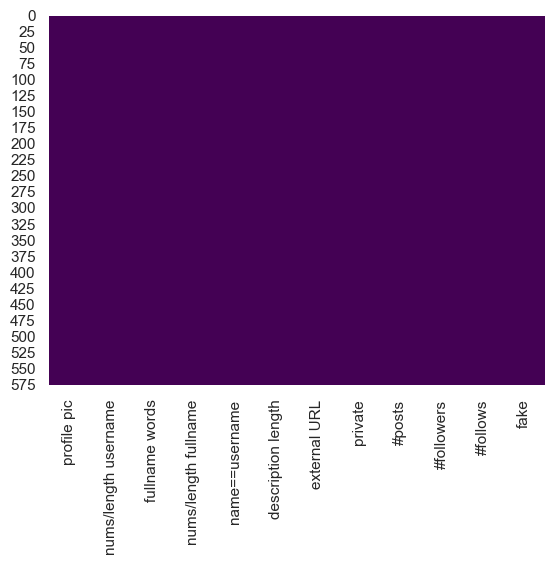

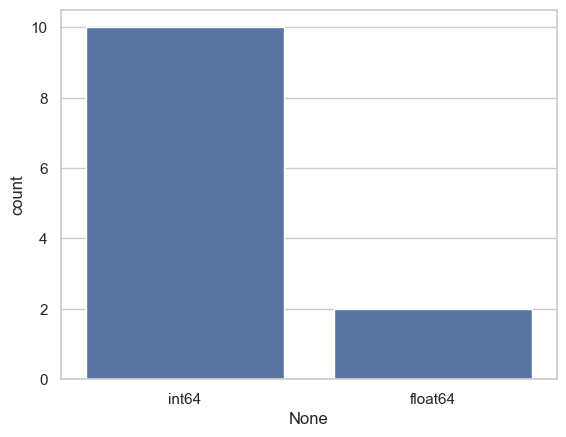

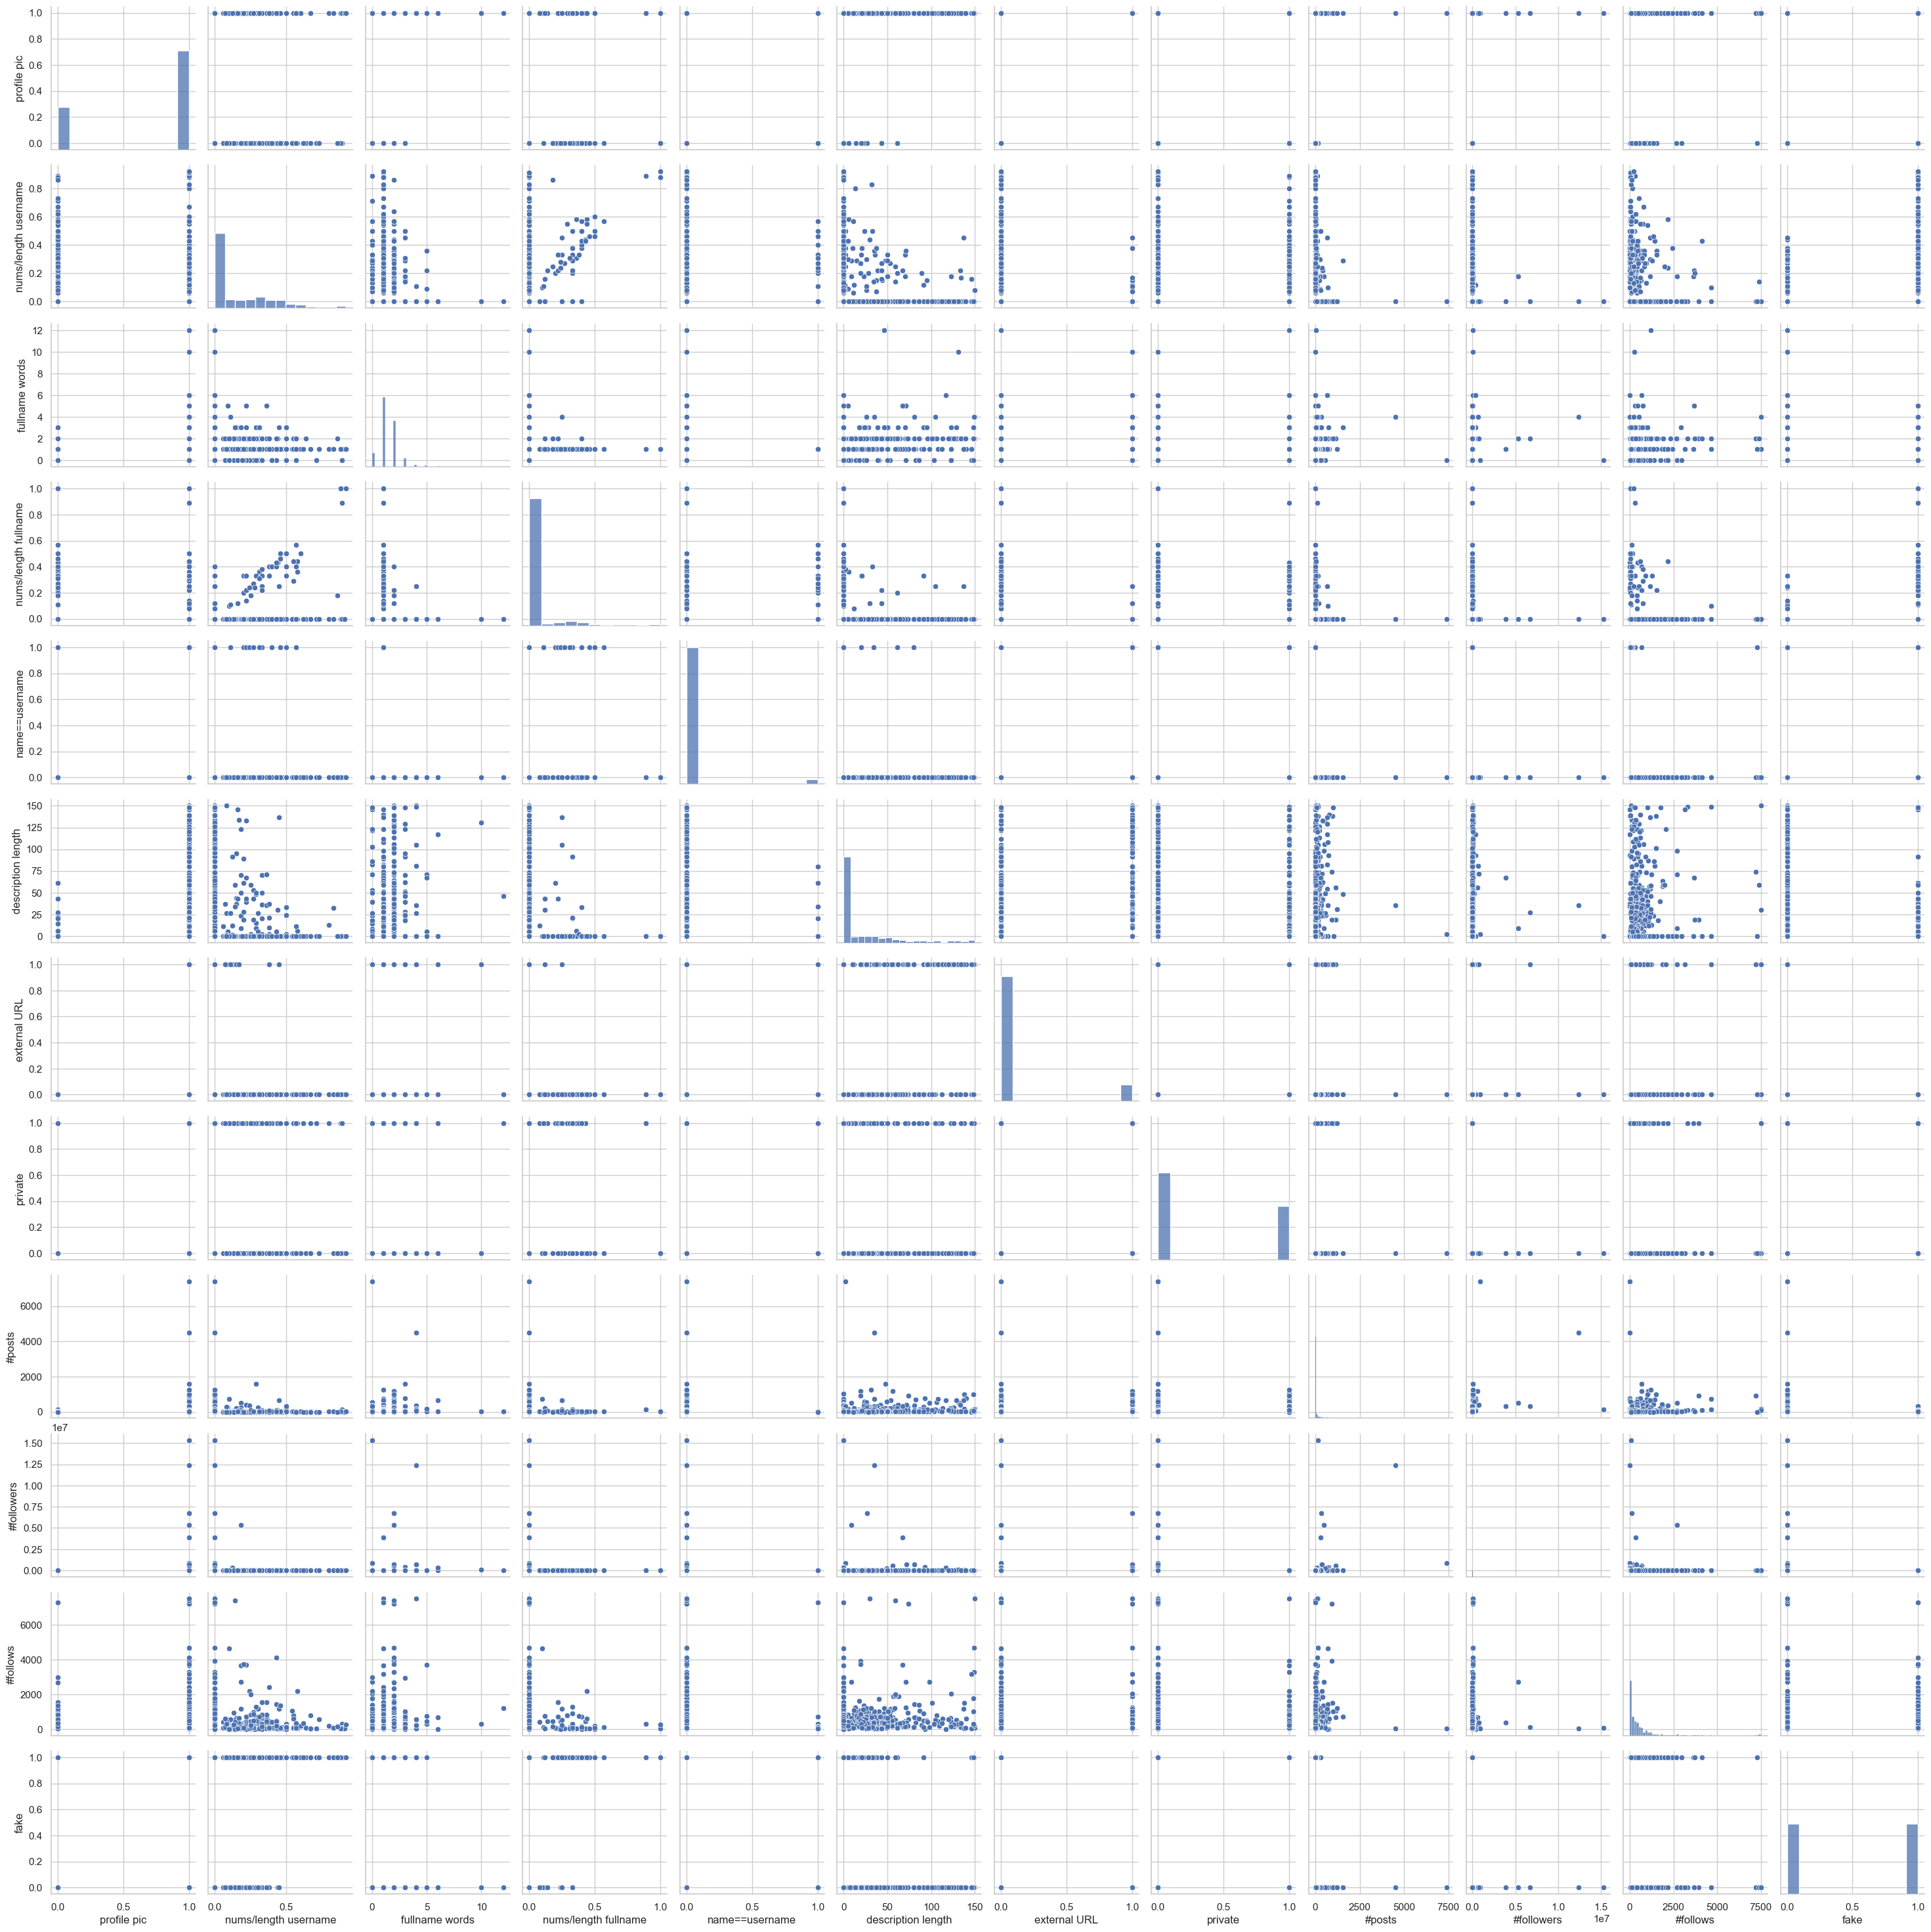

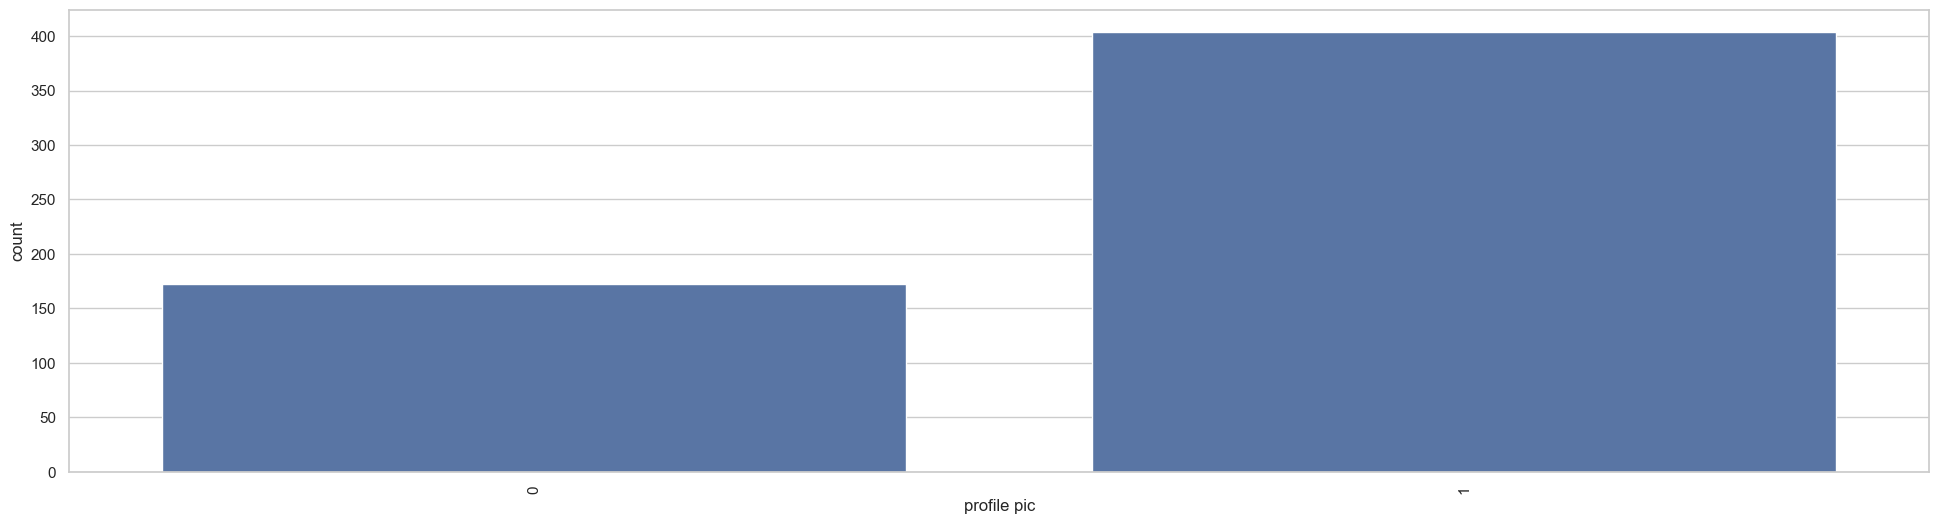

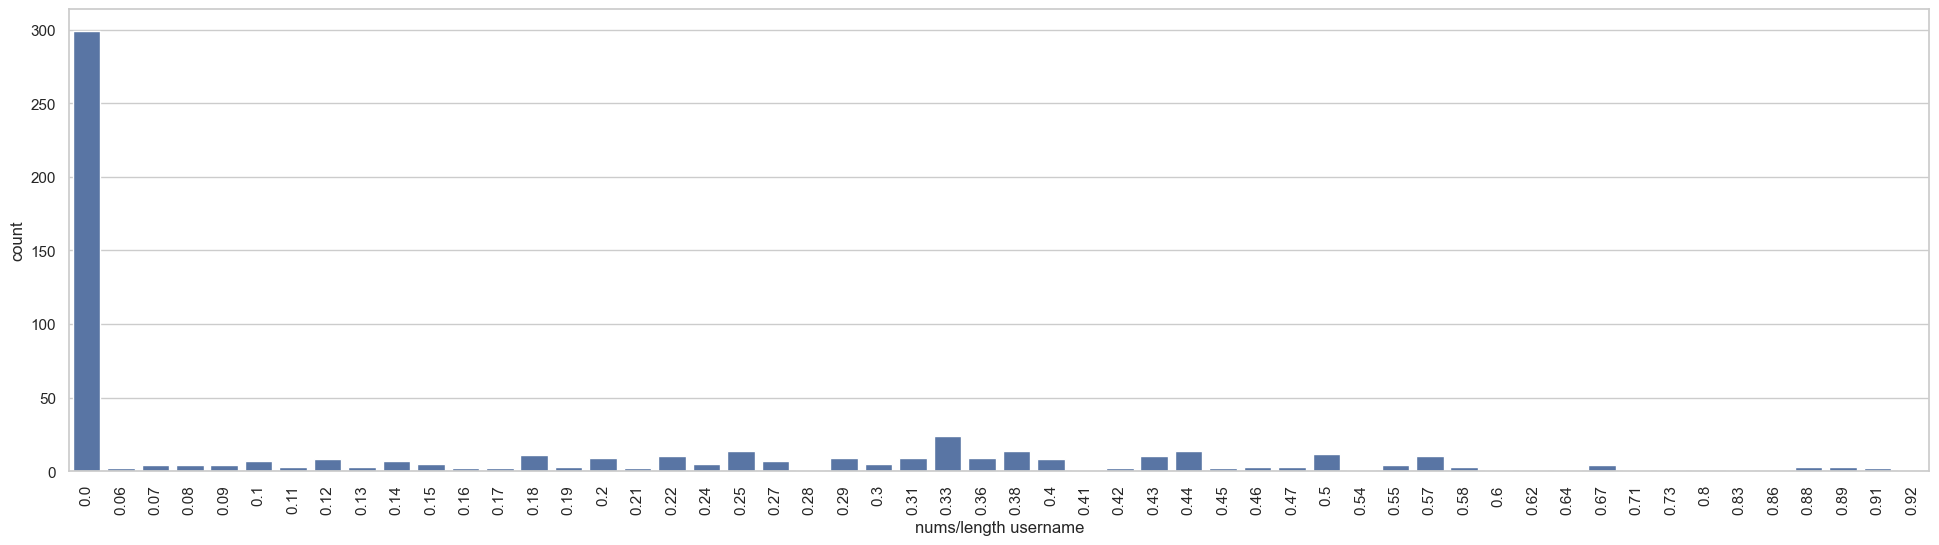

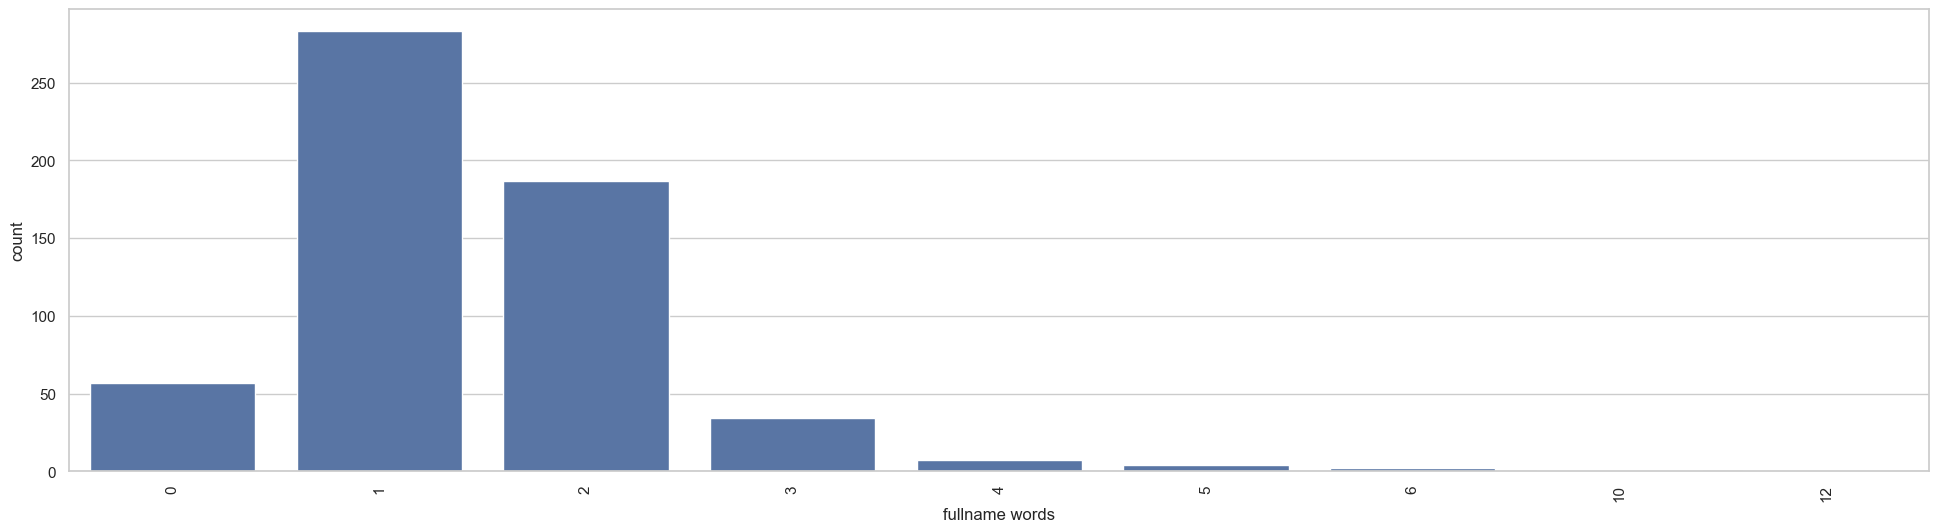

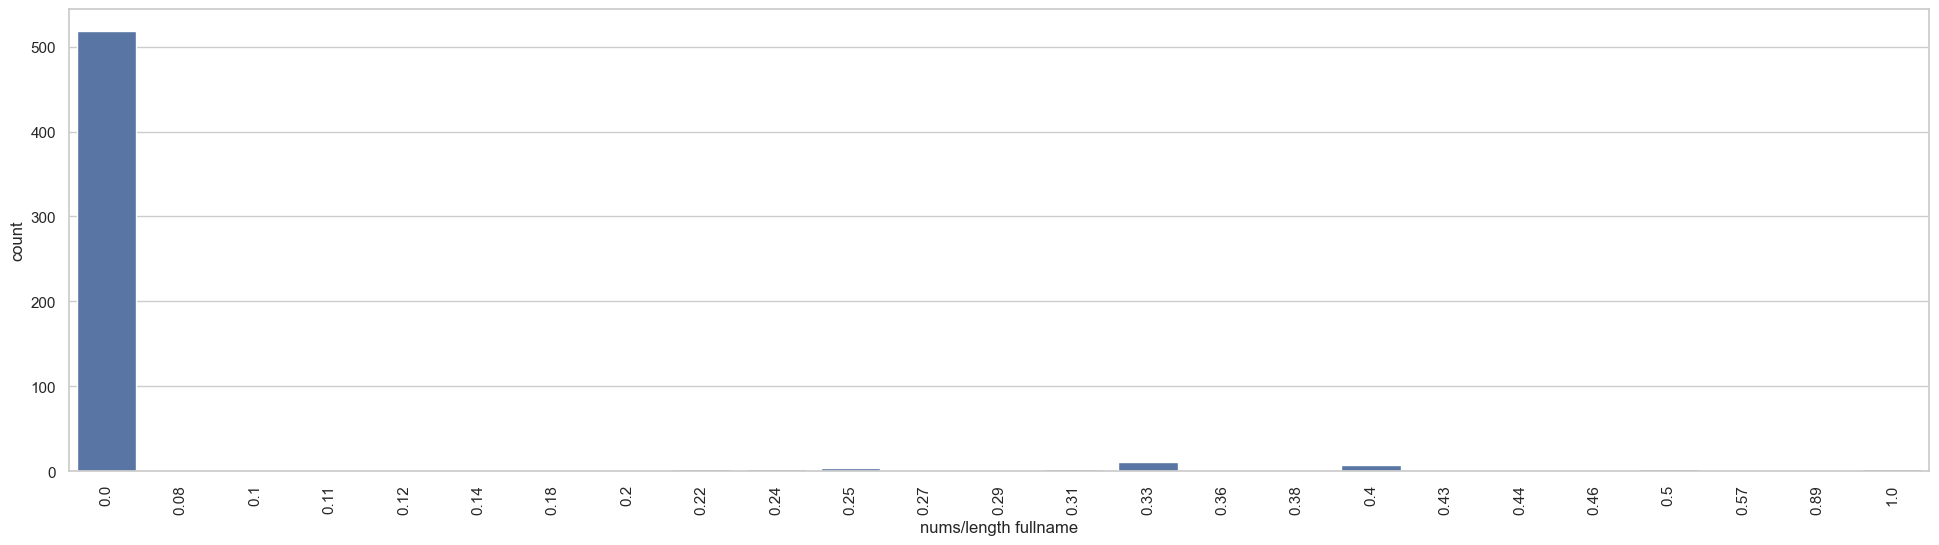

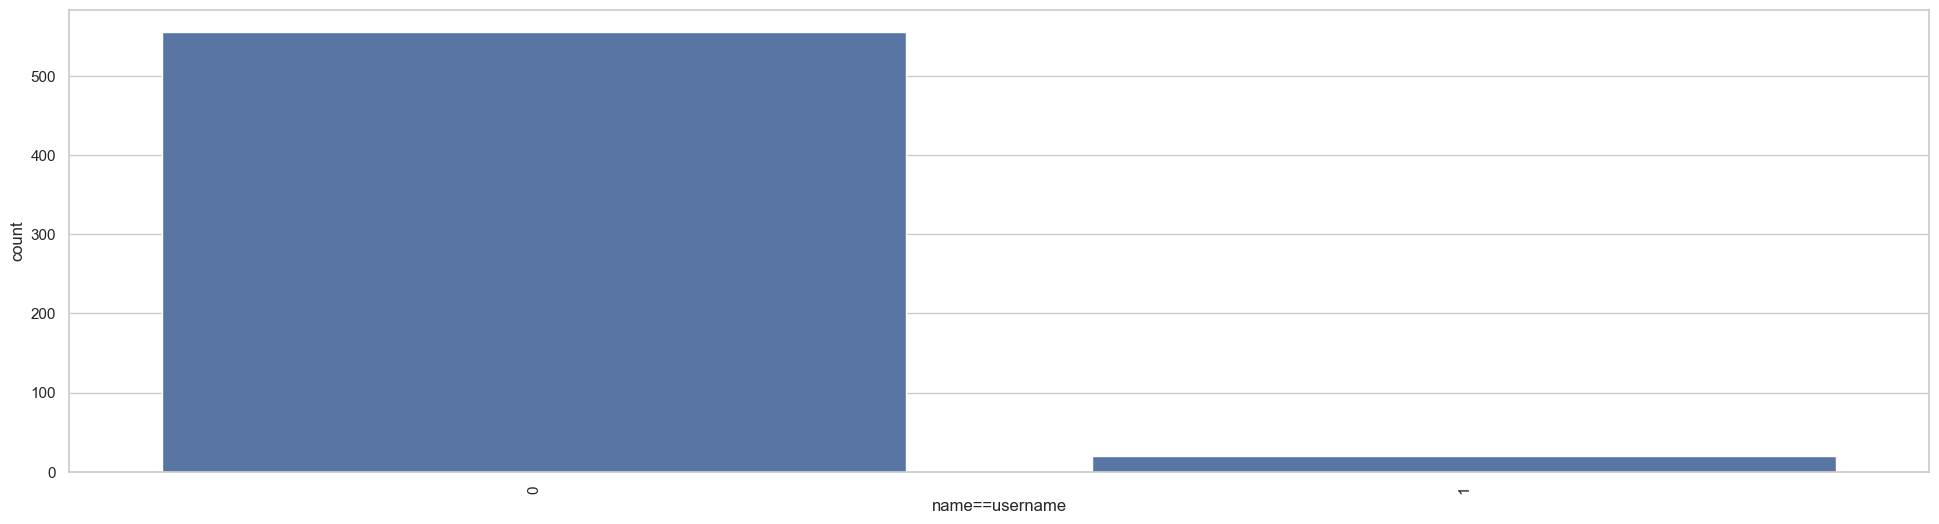

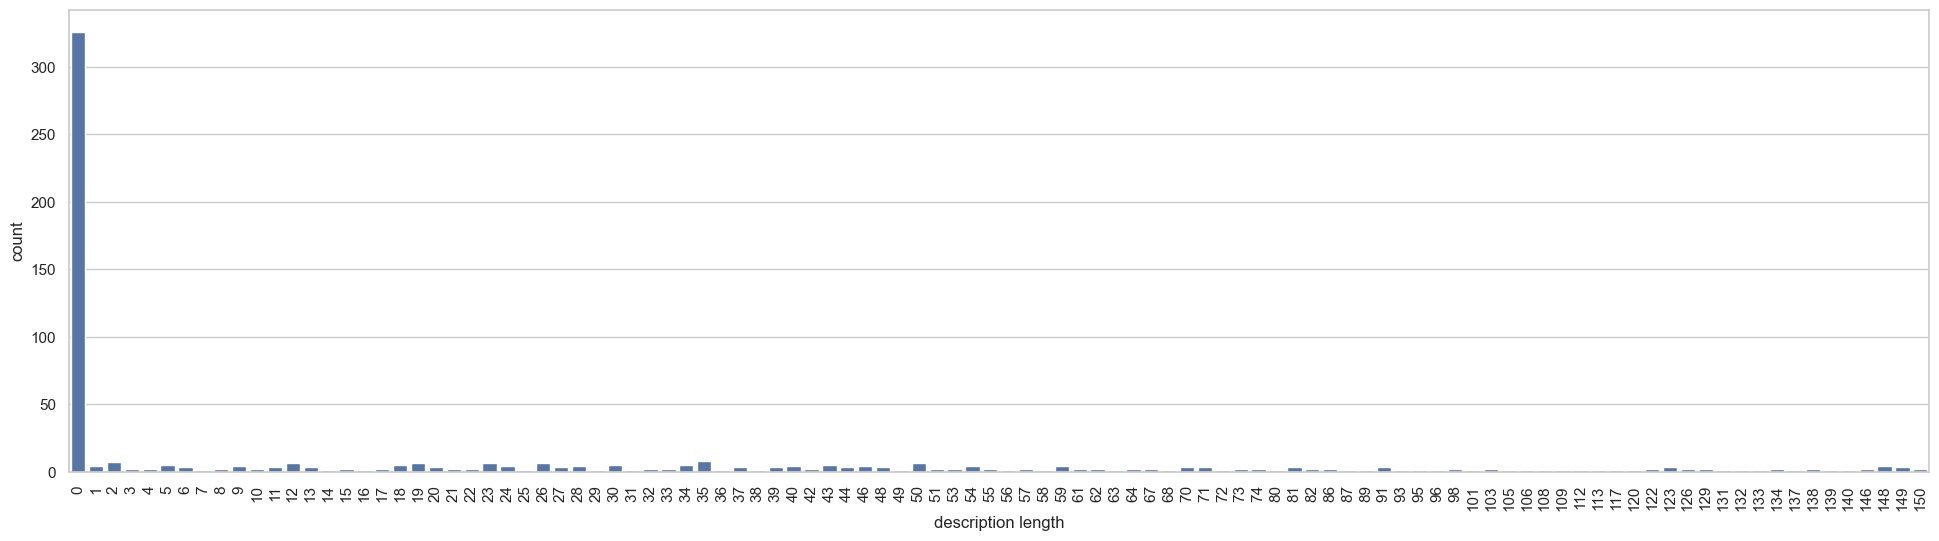

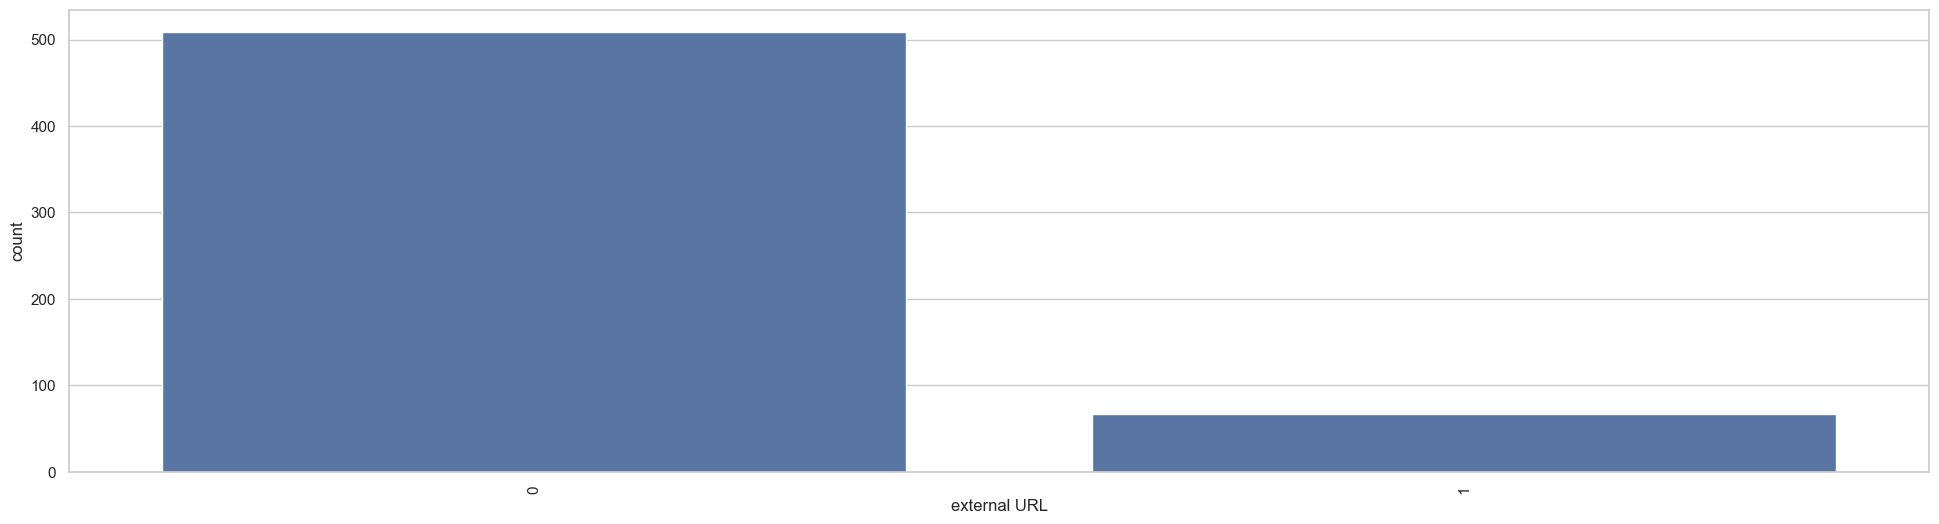

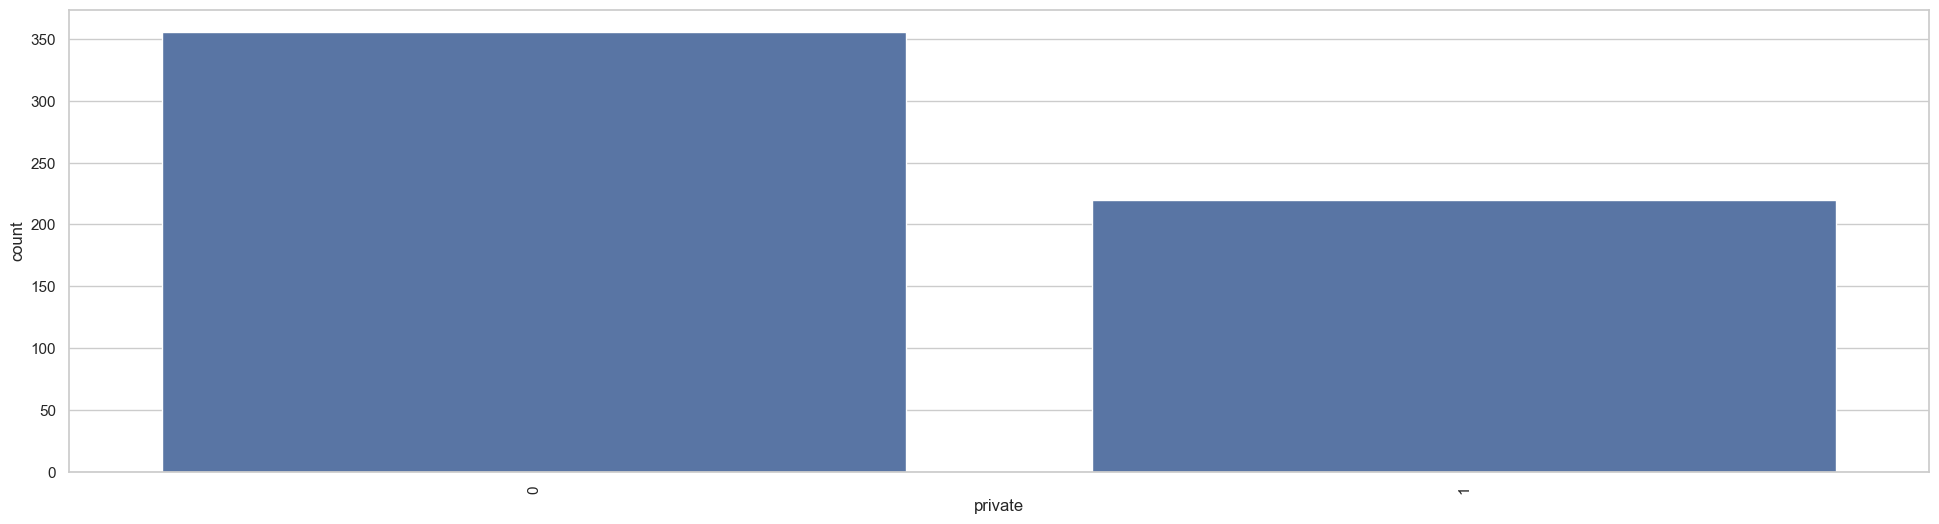

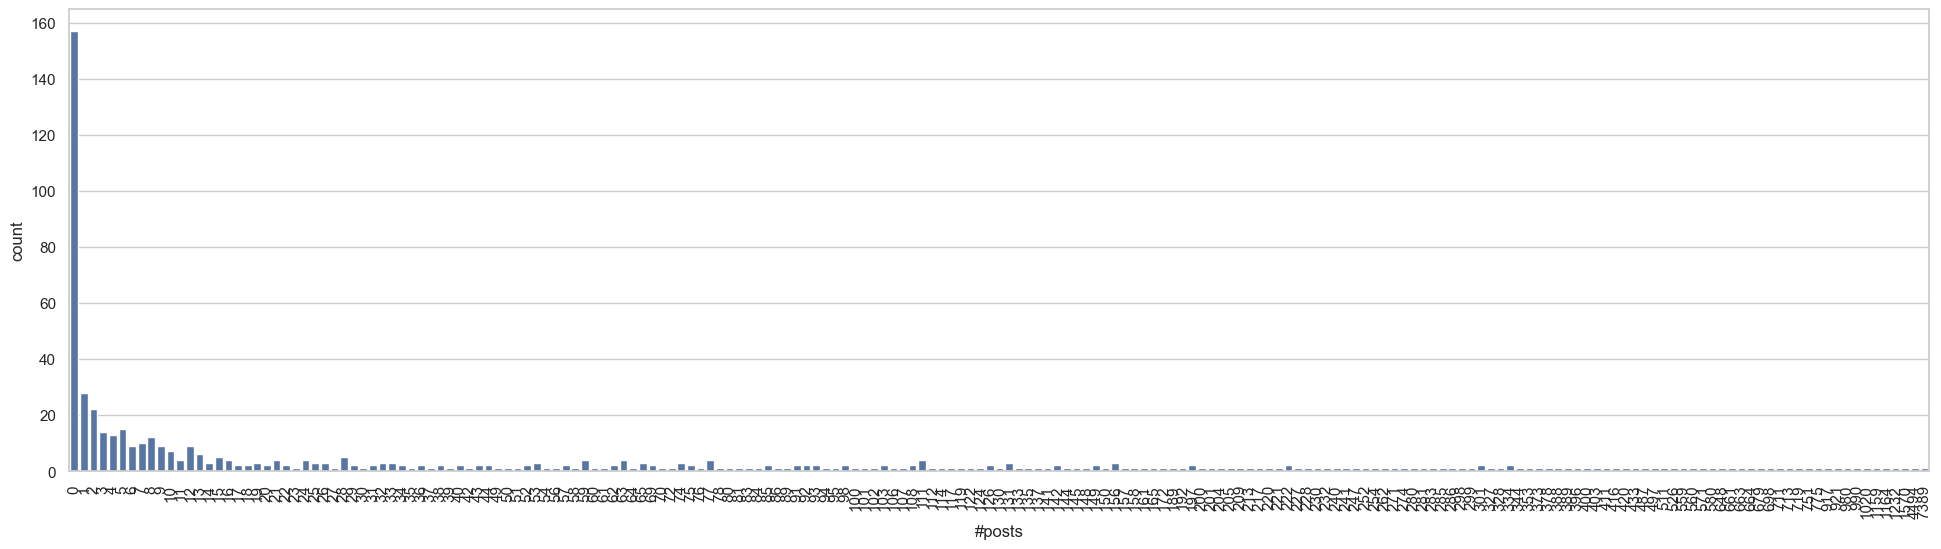

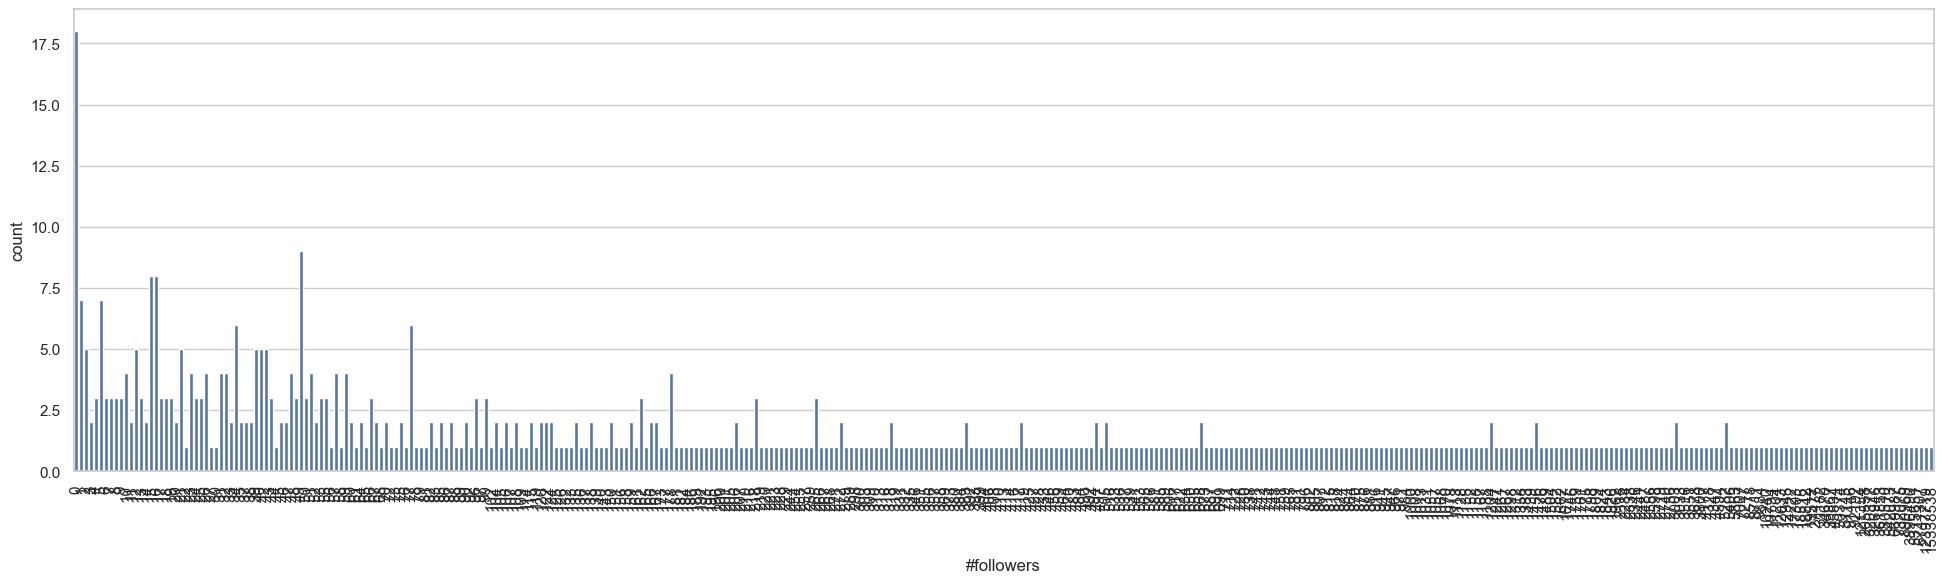

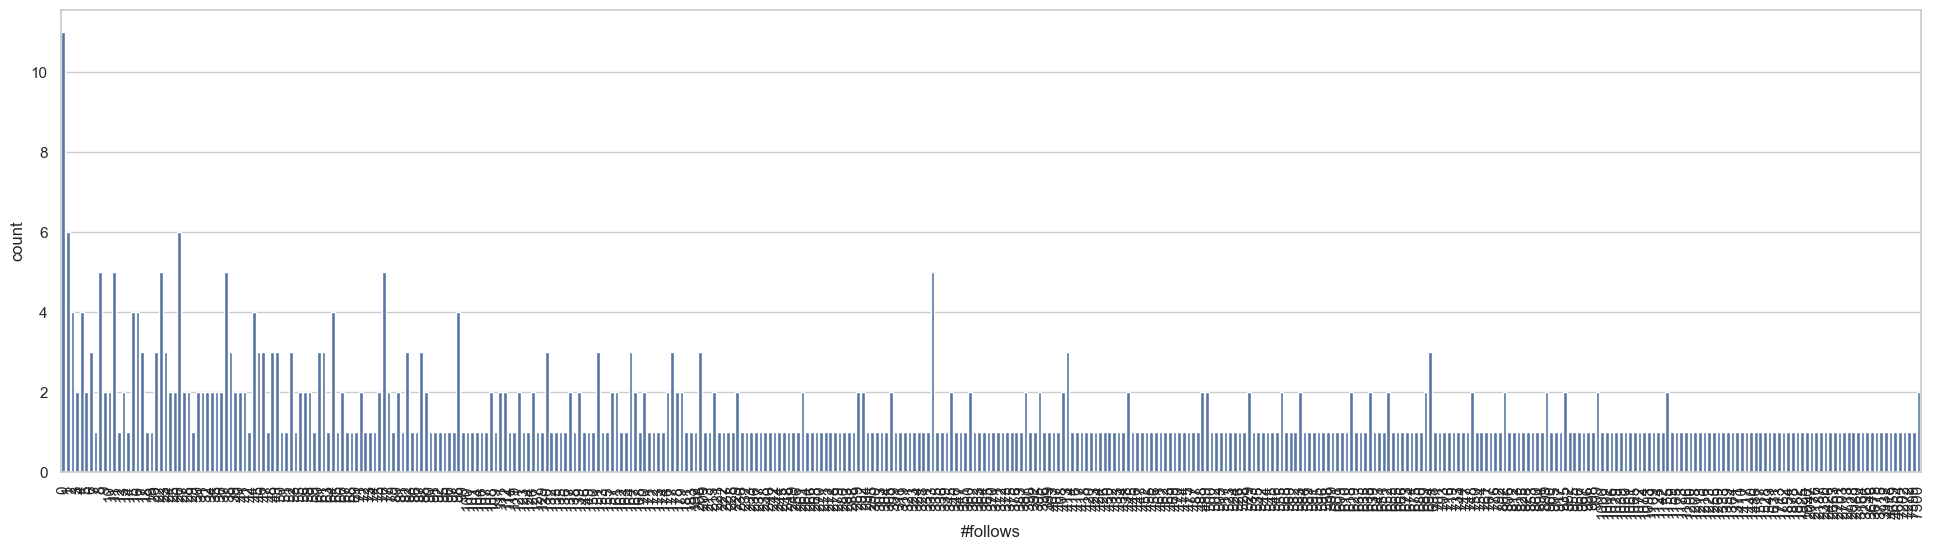

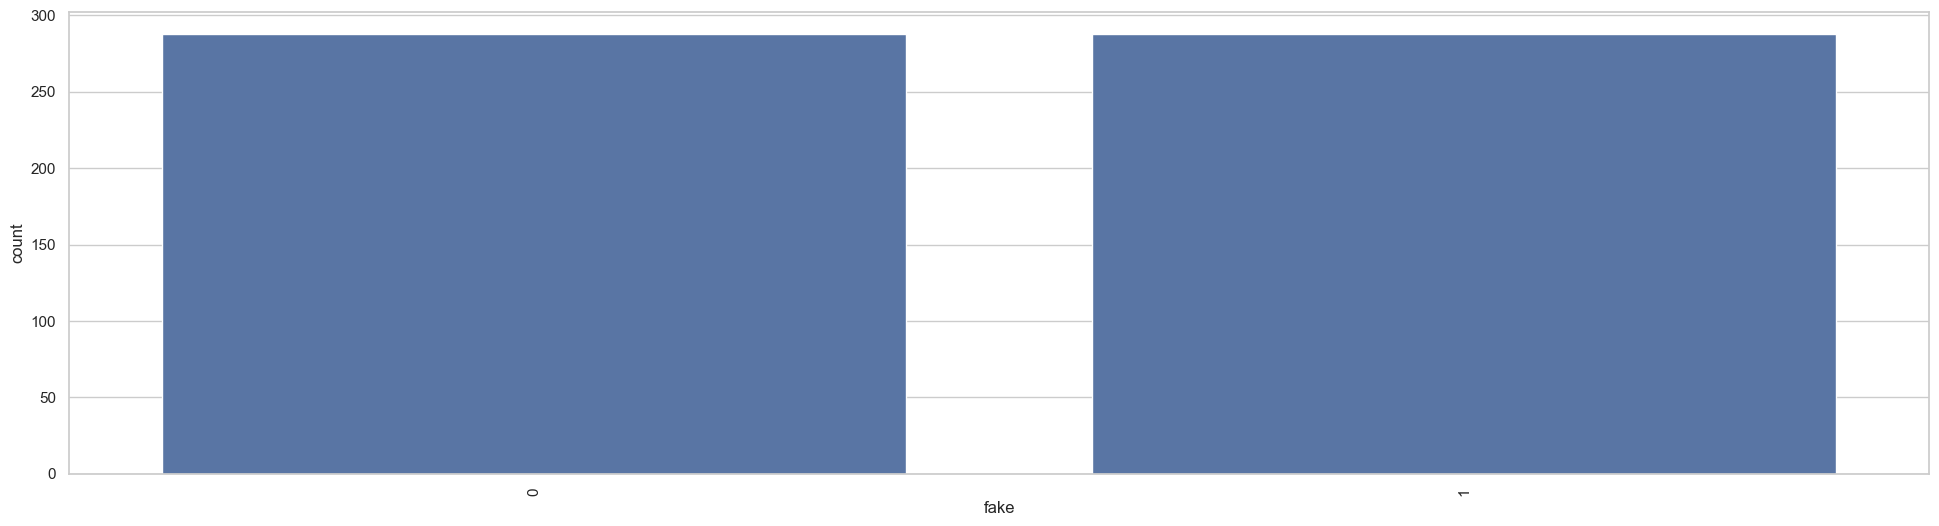

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("new_data/train.csv")

# Display the first few rows of the dataset
print(train.head())
# Get information about the dataset
print(train.info())

# Plot missing values using Seaborn
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.show()

# Plot the distribution of data types
sns.set(style="whitegrid")
sns.countplot(x=train.dtypes)
plt.show()

# Visualize numeric features
sns.pairplot(train.select_dtypes(include='number'))
plt.show()

# Visualize categorical features
sns.set(style="whitegrid")
for column in train.select_dtypes(include='object').columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=train)
    plt.show()

# Visualize bias in the data
sns.set(style="whitegrid")
for column in train.columns:
    plt.figure(figsize=(24, 6))
    sns.countplot(x=column, data=train)
    plt.xticks(rotation=90)
    plt.show()

   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.33               1                  0.33   
1            1                  0.00               5                  0.00   
2            1                  0.00               2                  0.00   
3            1                  0.00               1                  0.00   
4            1                  0.50               1                  0.00   

   name==username  description length  external URL  private  #posts  \
0               1                  30             0        1      35   
1               0                  64             0        1       3   
2               0                  82             0        1     319   
3               0                 143             0        1     273   
4               0                  76             0        1       6   

   #followers  #follows  fake  
0         488       604     0  
1          35         6     0  
2 

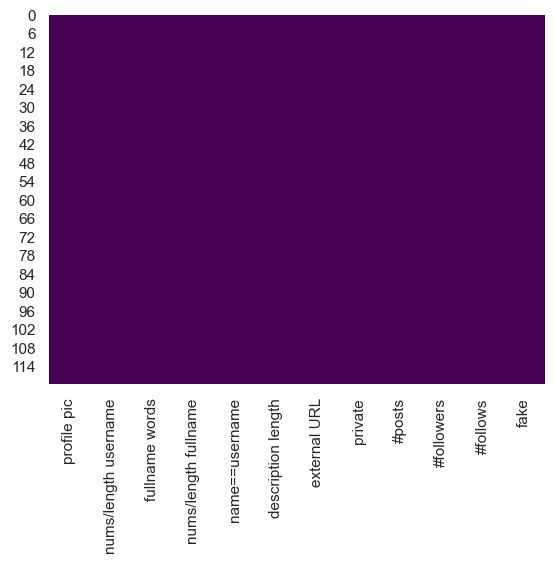

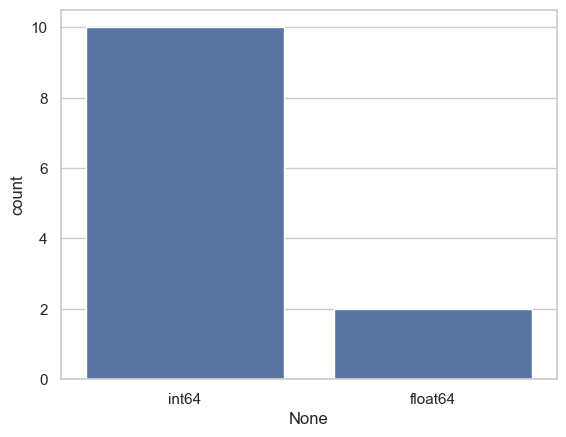

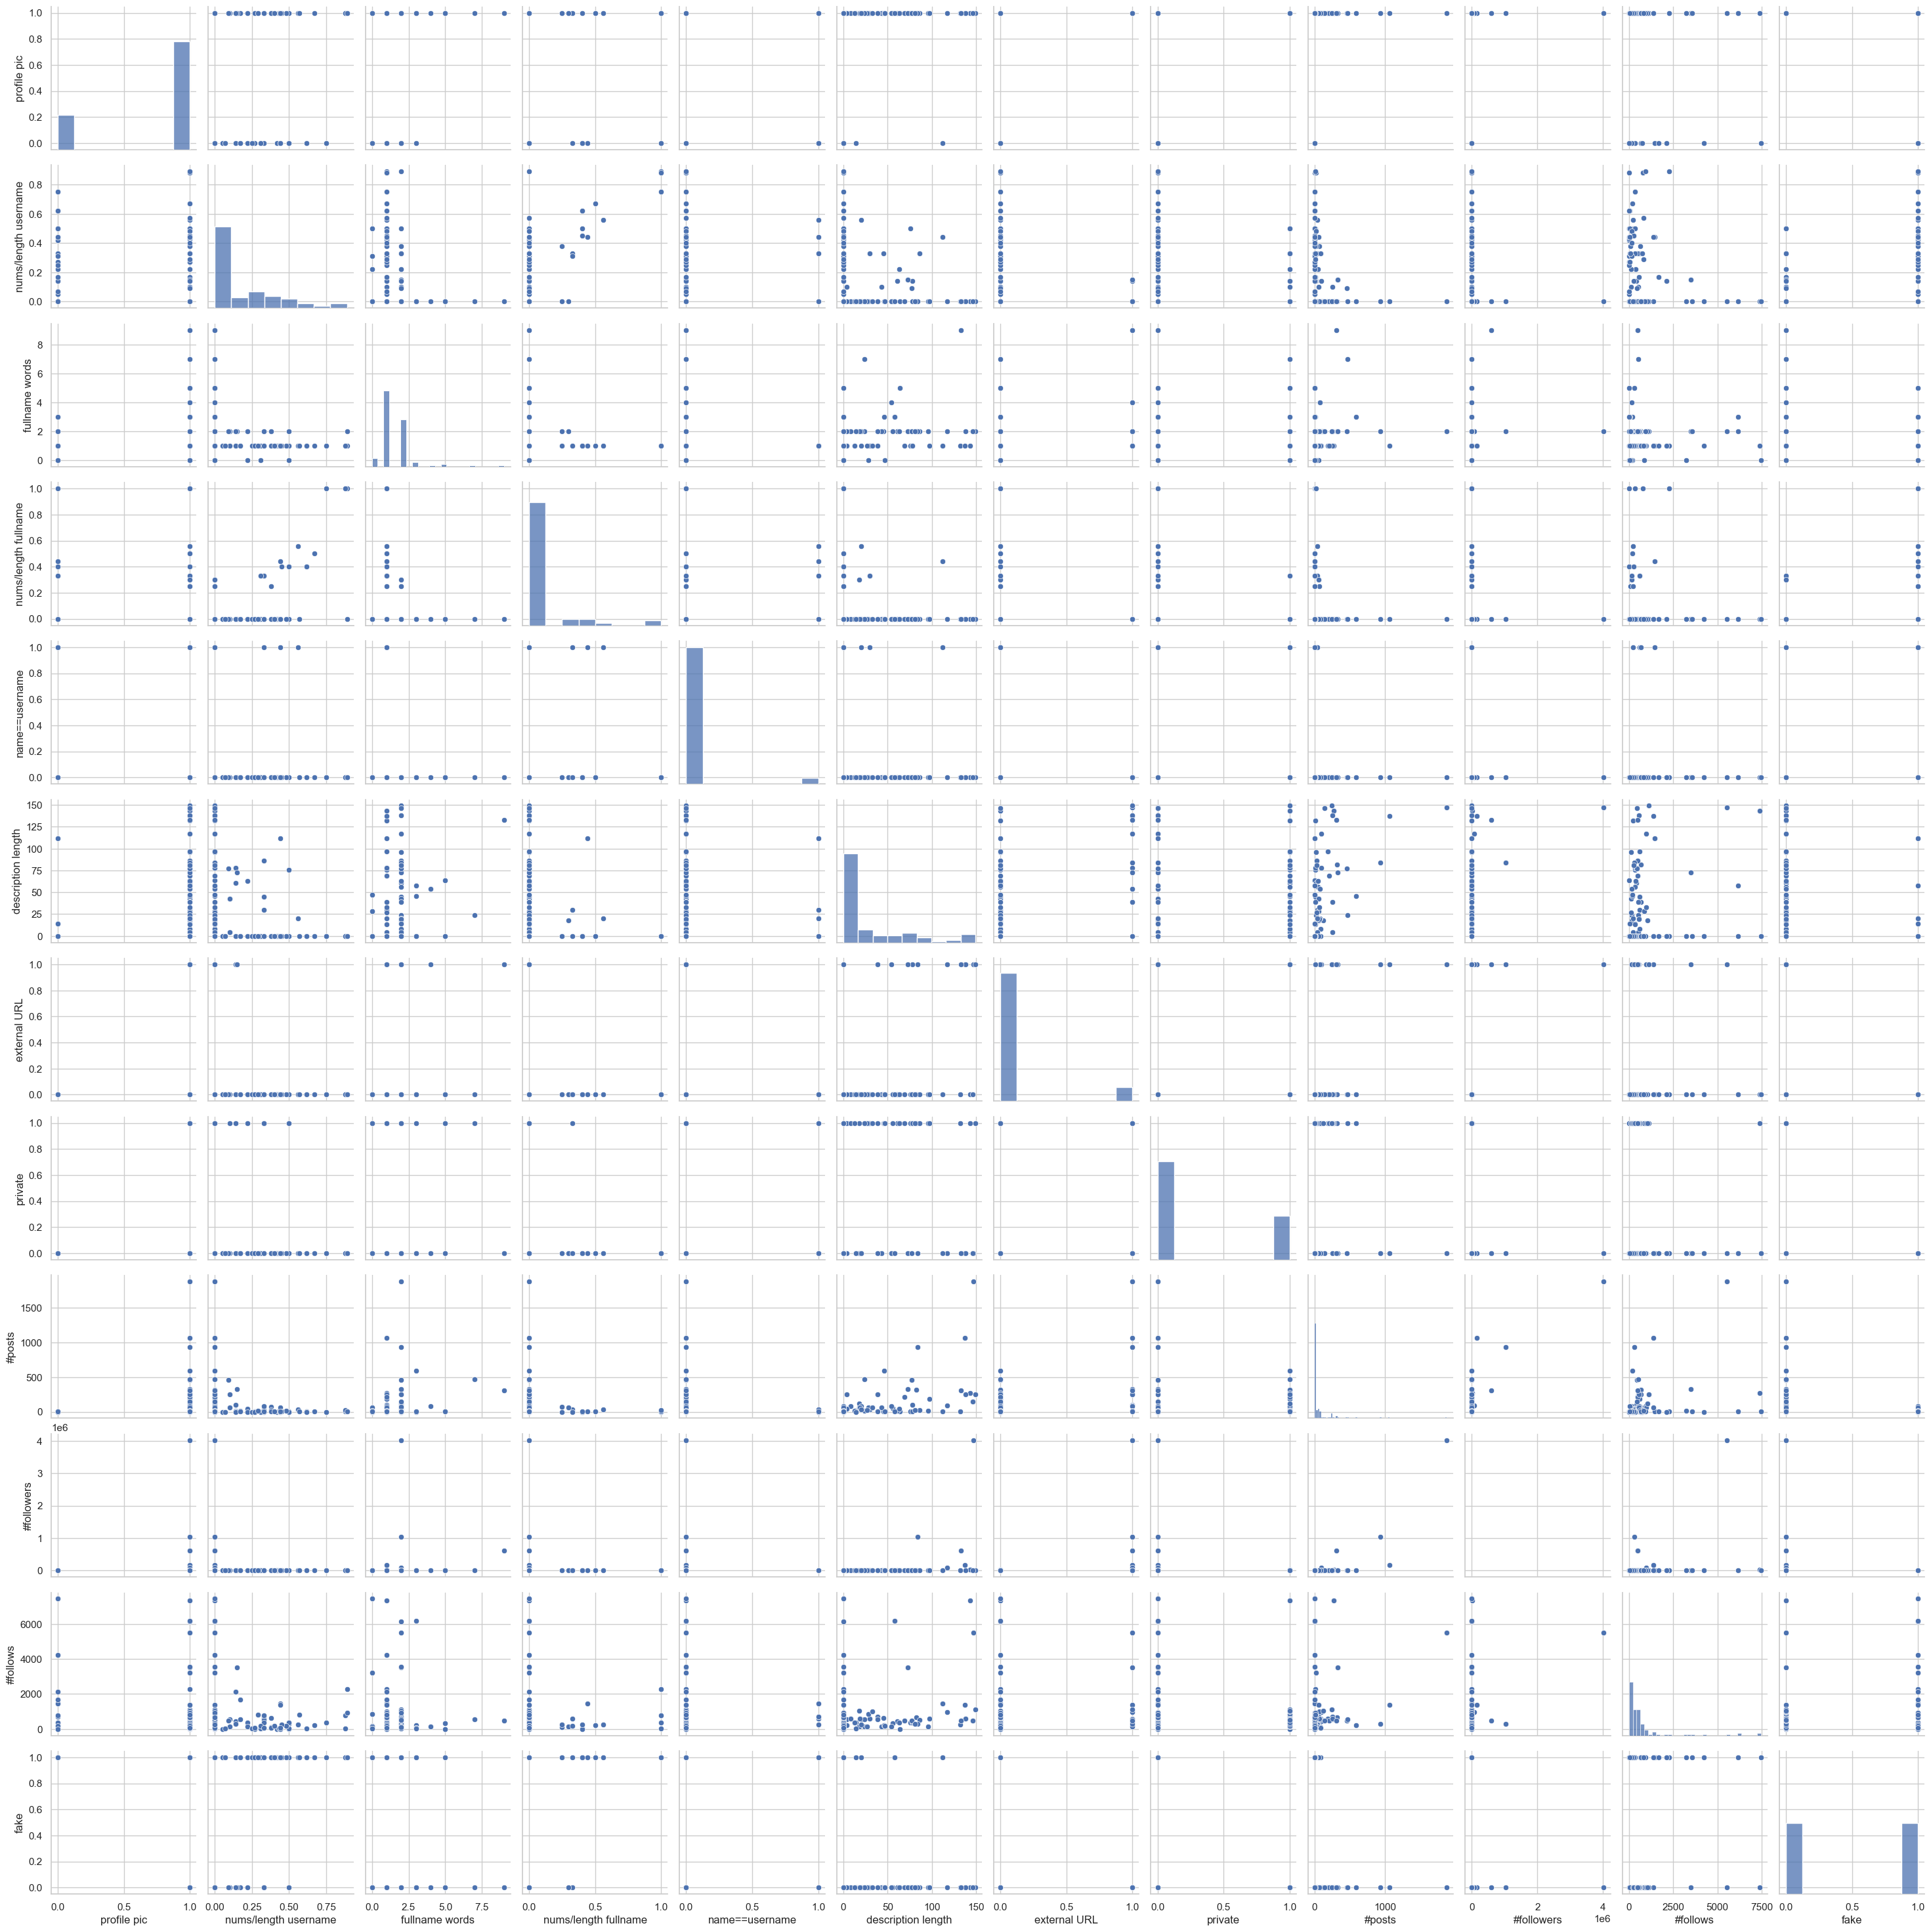

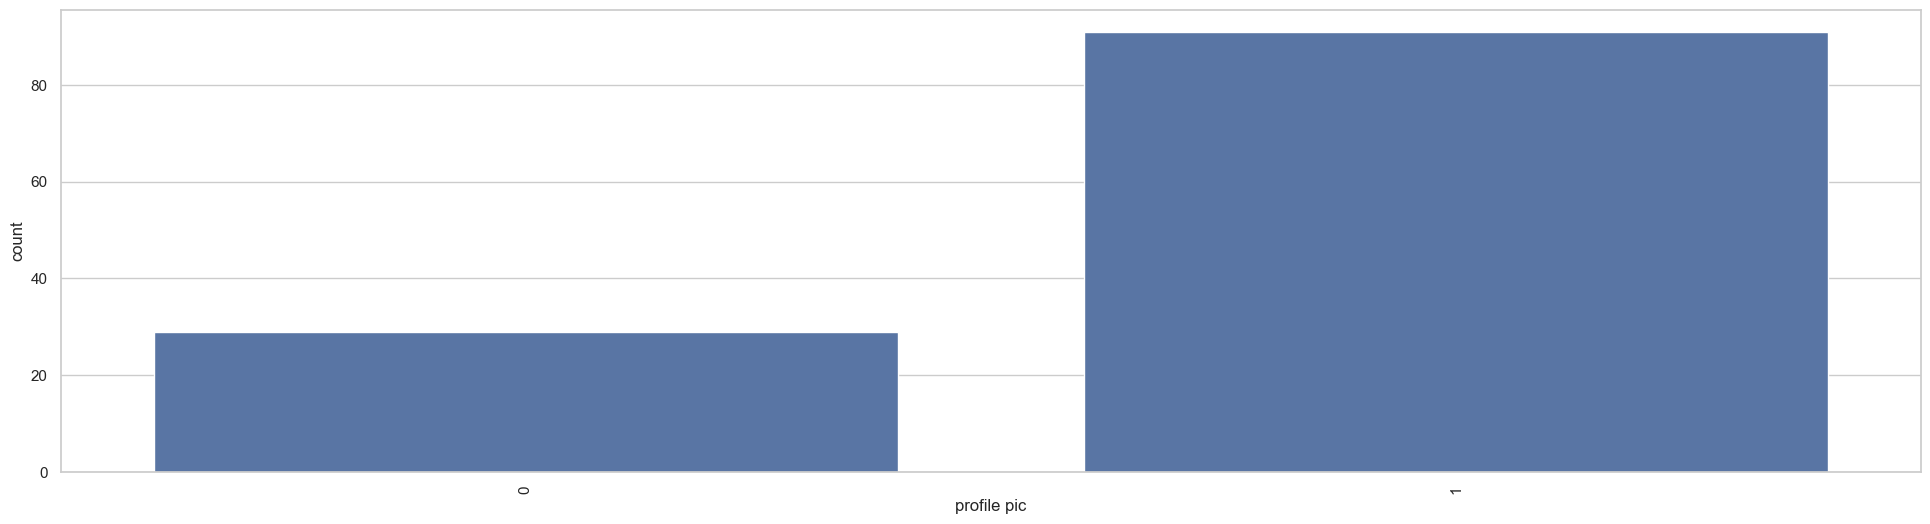

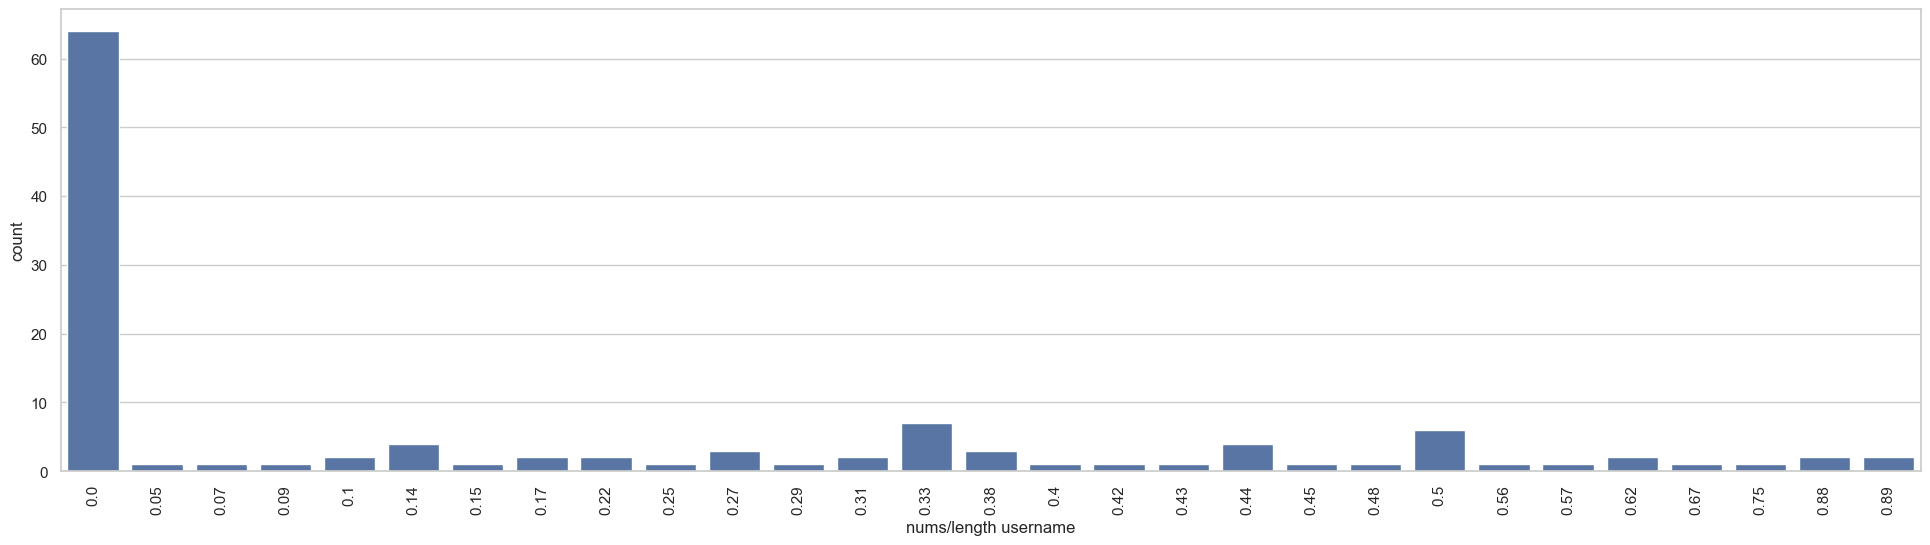

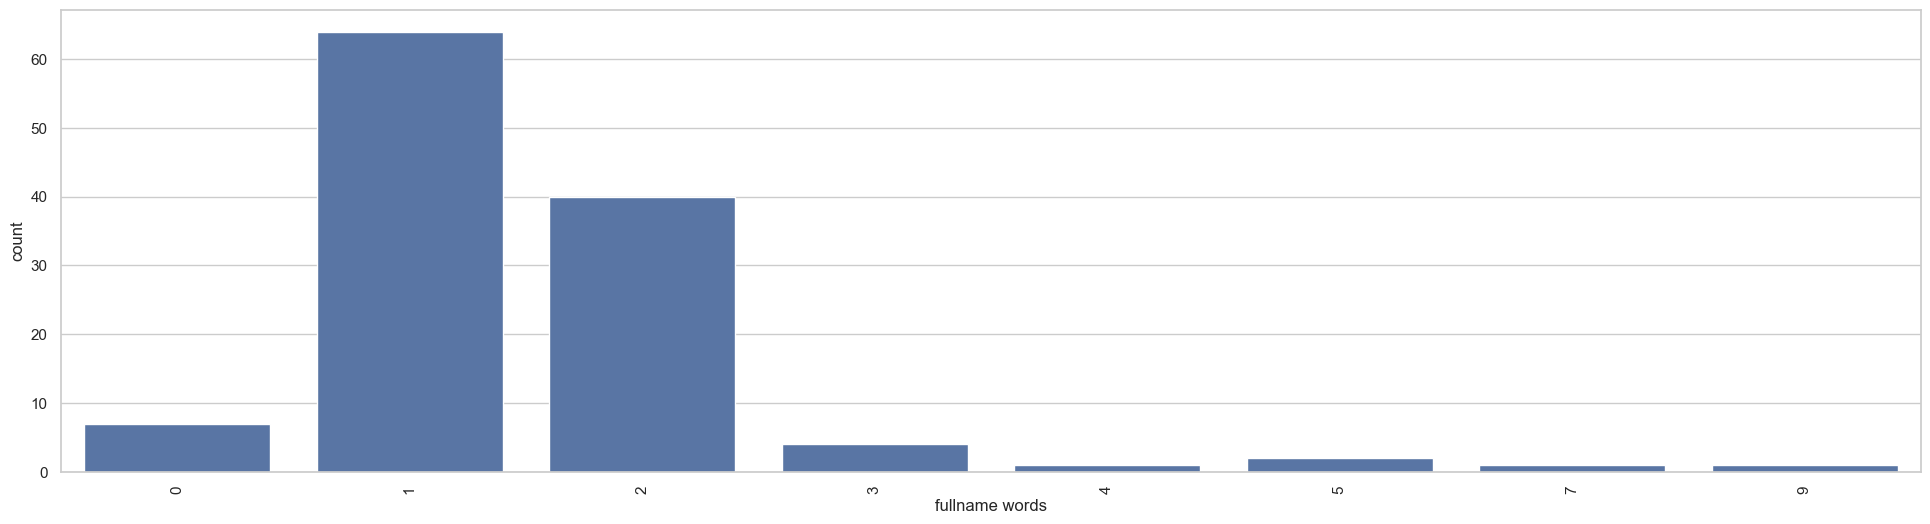

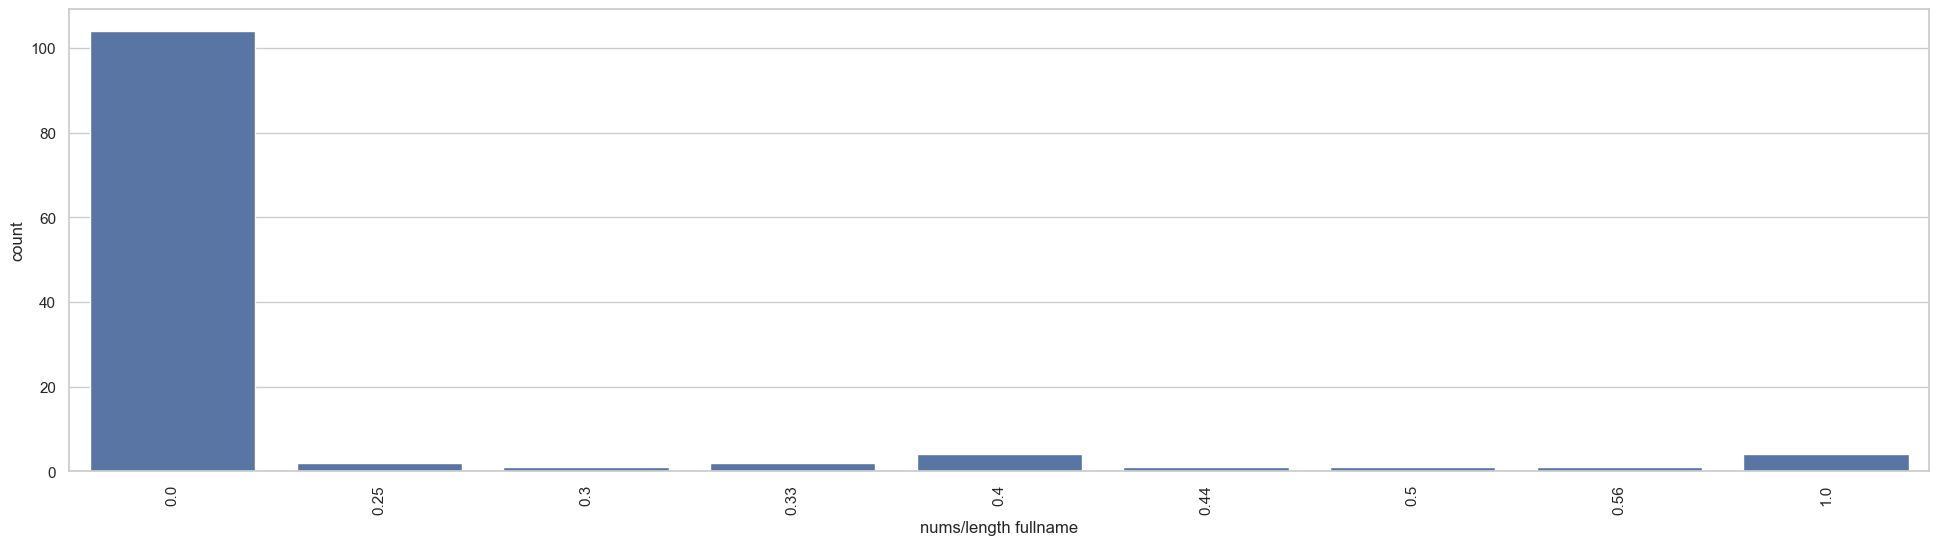

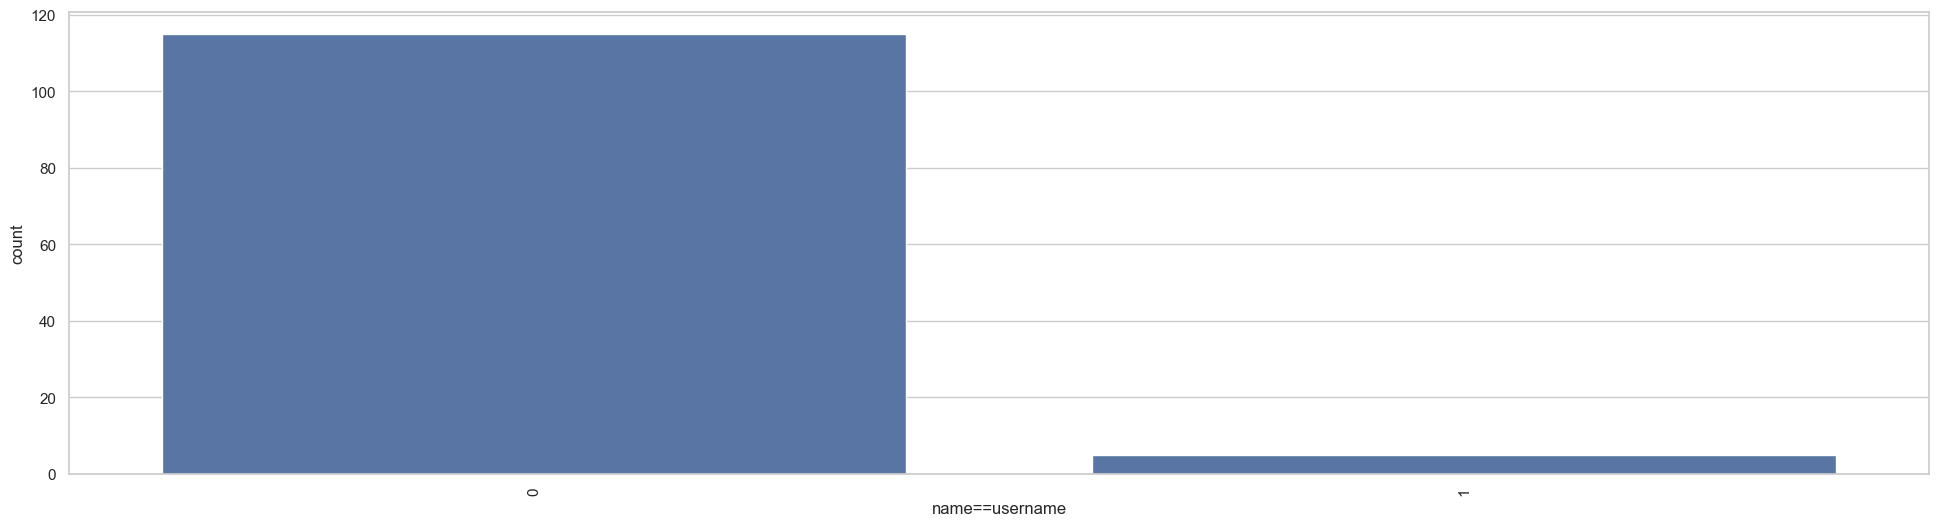

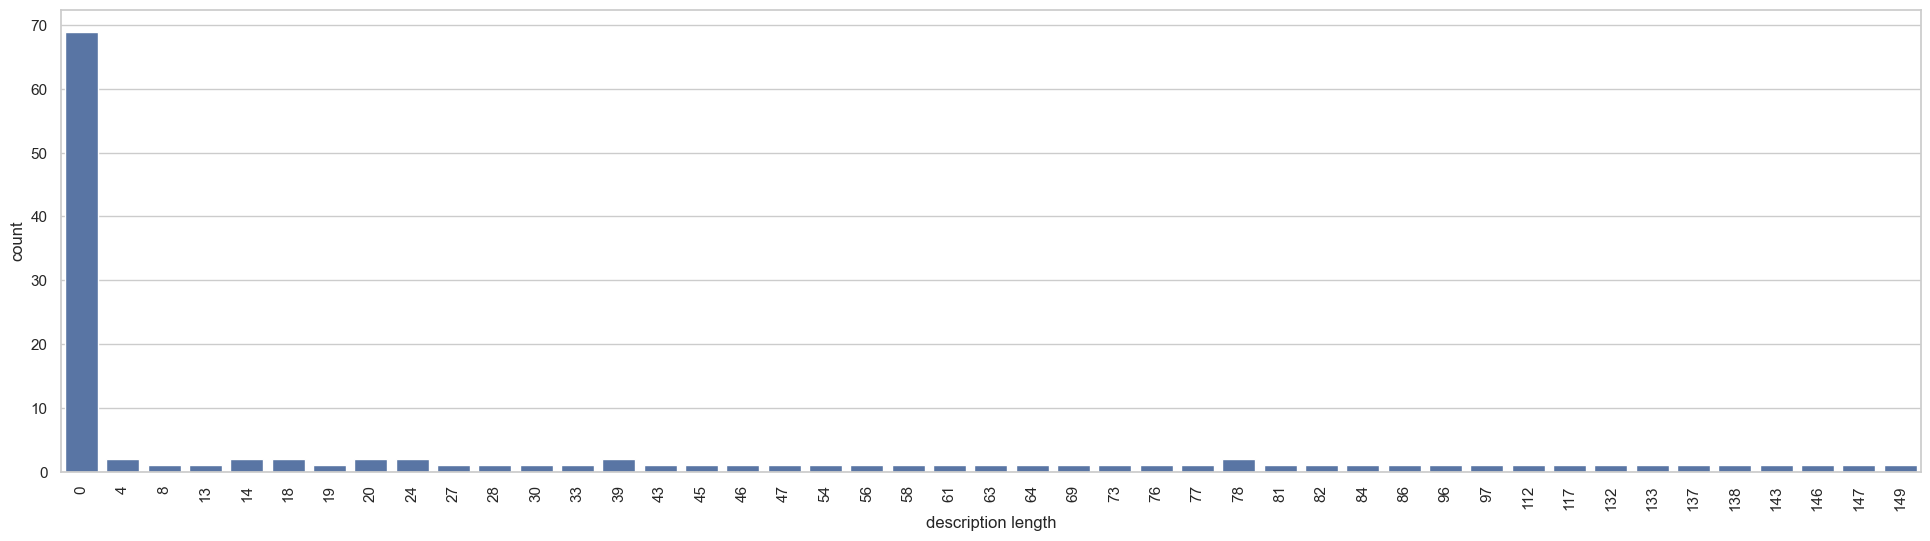

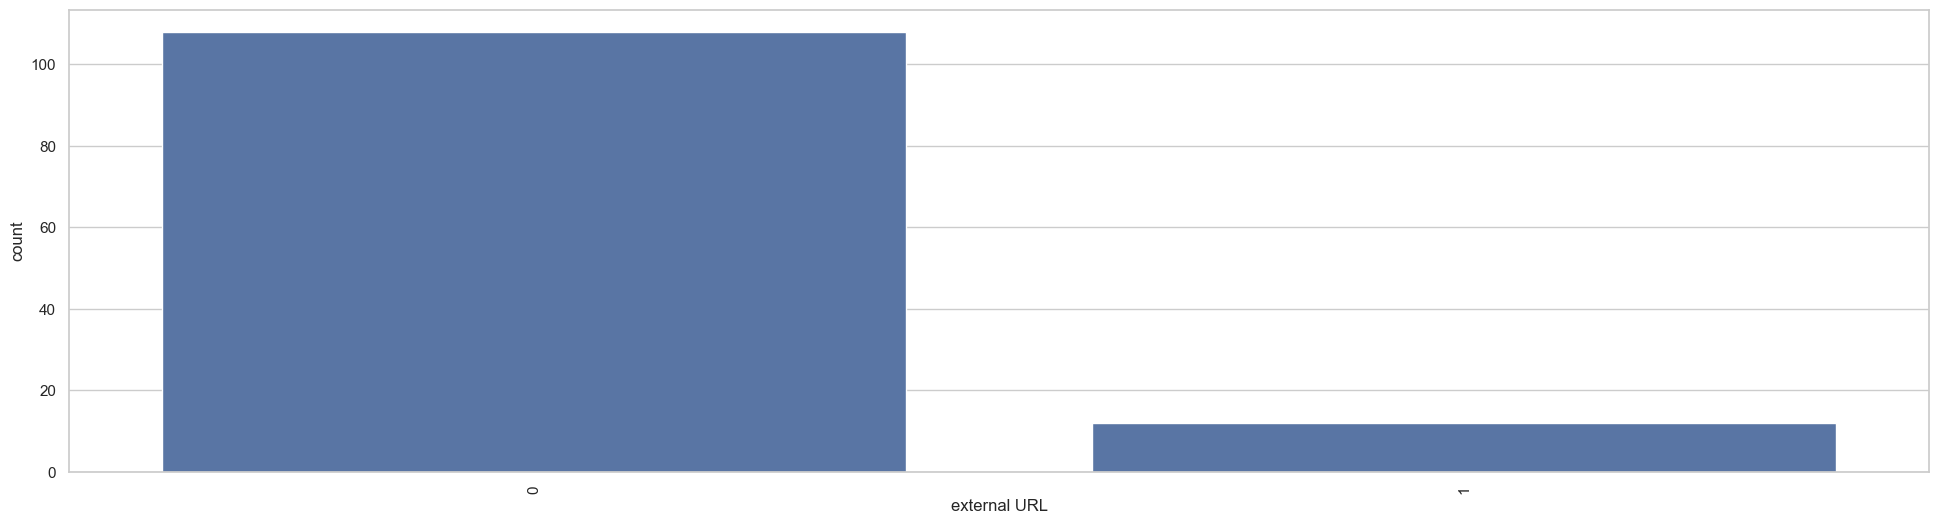

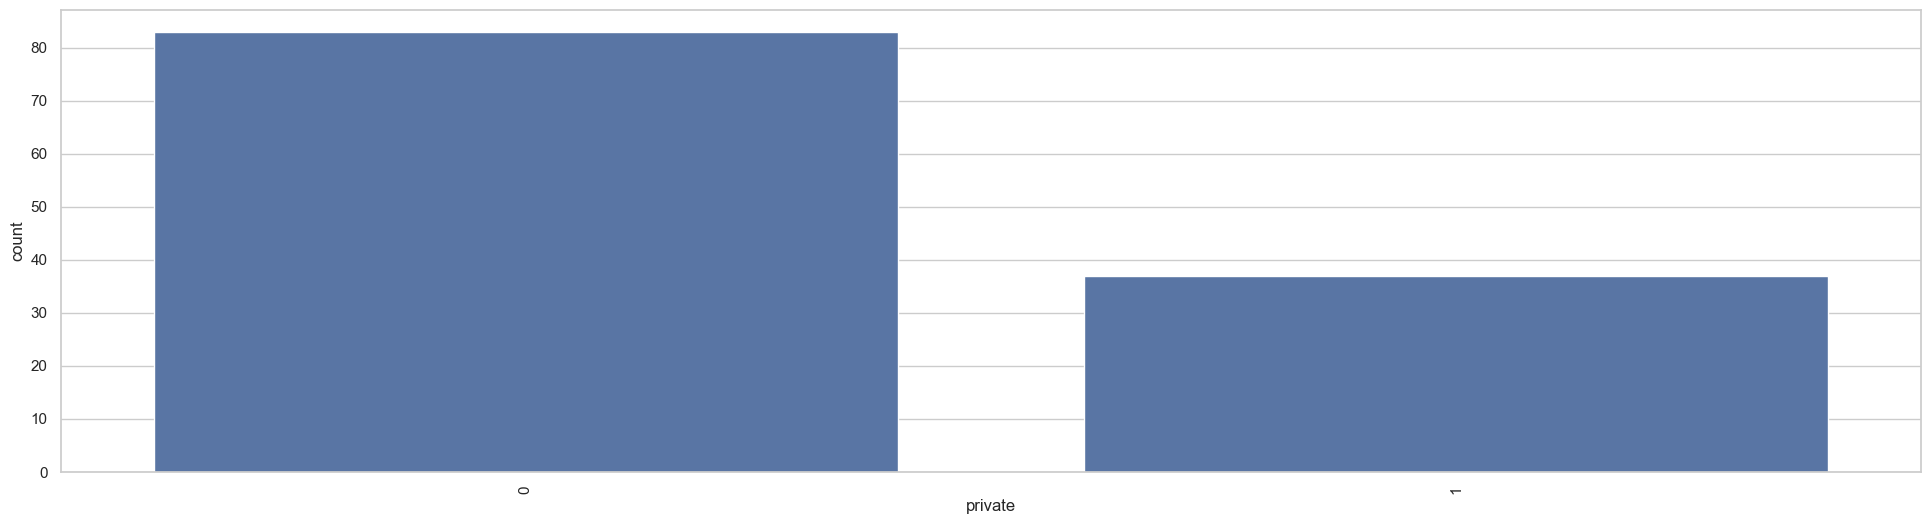

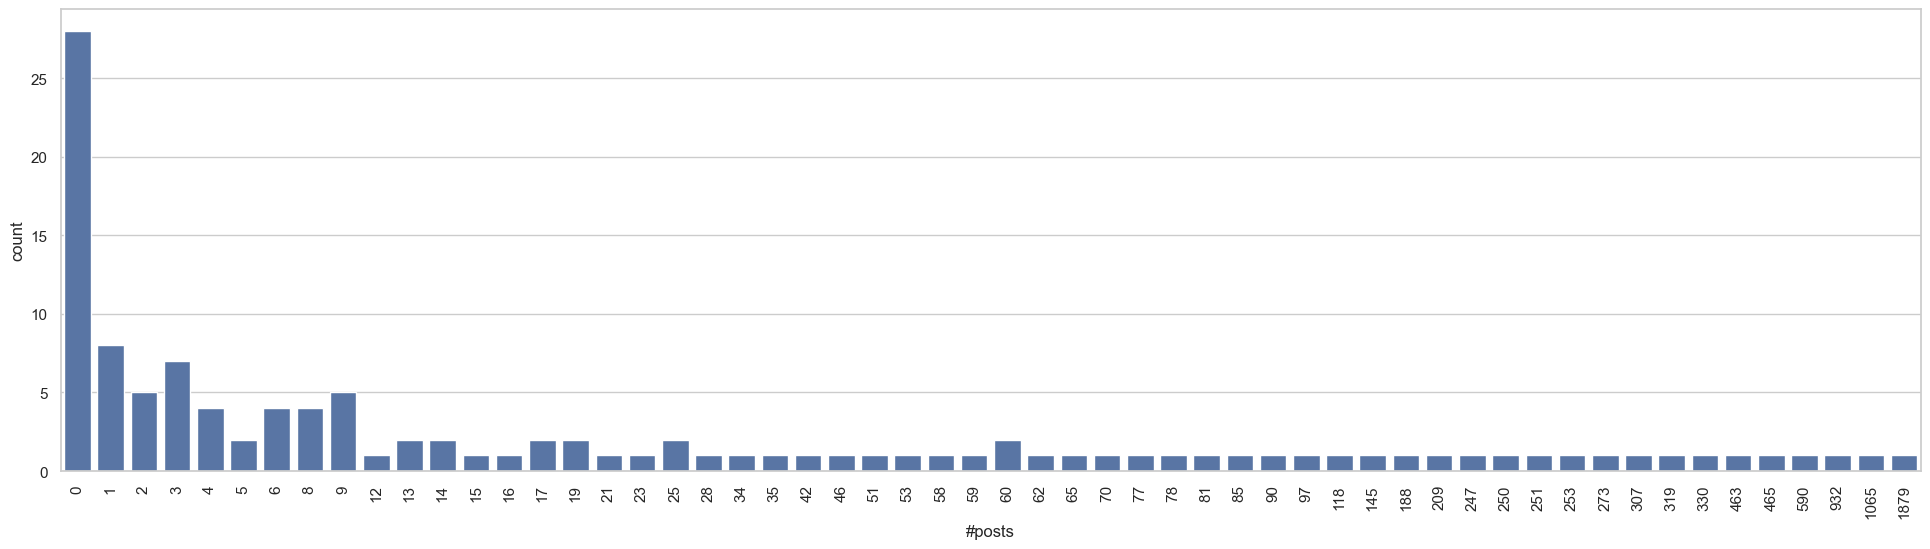

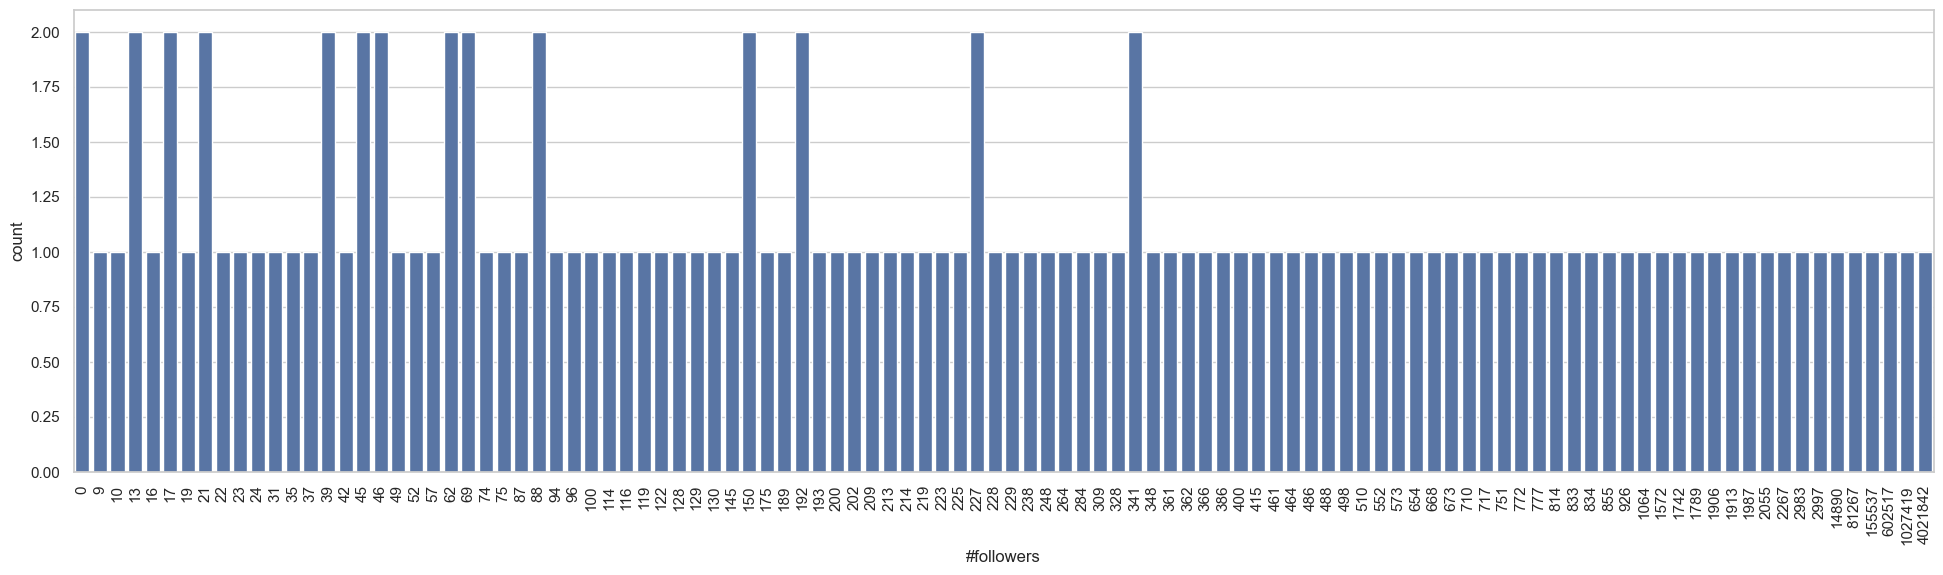

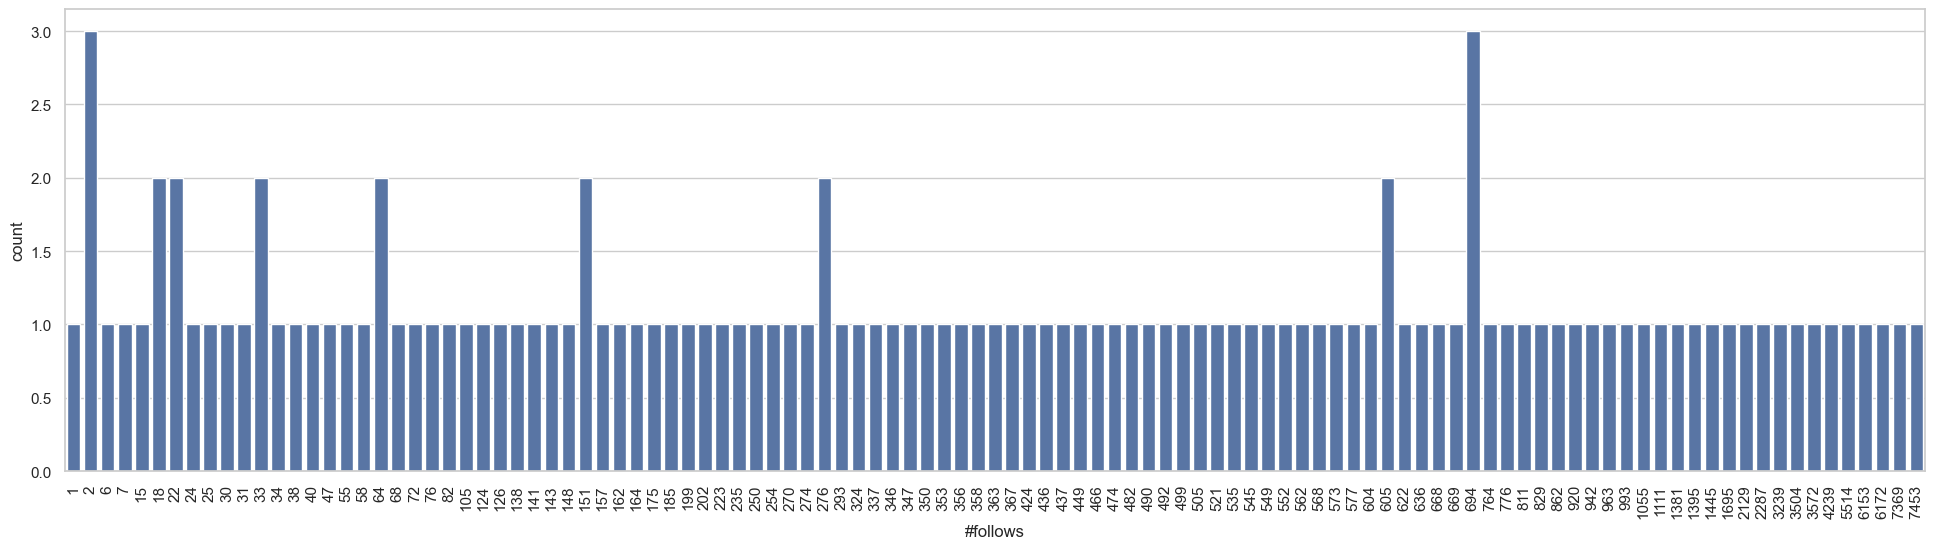

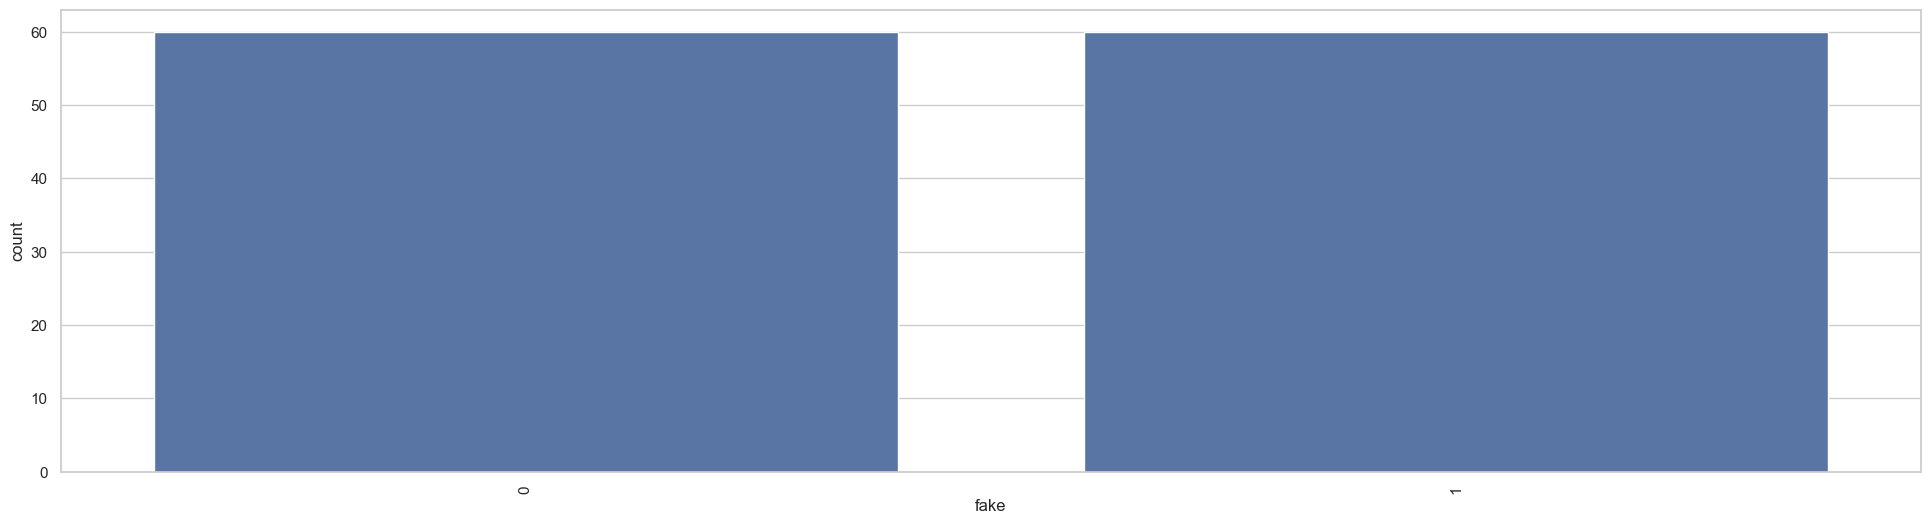

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test = pd.read_csv("new_data/test.csv")

# Display the first few rows of the dataset
print(test.head())
# Get information about the dataset
print(test.info())

# Plot missing values using Seaborn
sns.heatmap(test.isnull(), cbar=False, cmap='viridis')
plt.show()

# Plot the distribution of data types
sns.set(style="whitegrid")
sns.countplot(x=test.dtypes)
plt.show()

# Visualize numeric features
sns.pairplot(test.select_dtypes(include='number'))
plt.show()

# Visualize categorical features
sns.set(style="whitegrid")
for column in test.select_dtypes(include='object').columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=test)
    plt.show()

# Visualize bias in the data
sns.set(style="whitegrid")
for column in test.columns:
    plt.figure(figsize=(24, 6))
    sns.countplot(x=column, data=test)
    plt.xticks(rotation=90)
    plt.show()

# The data preprocessing

In [184]:
train = pd.read_csv("new_data/train.csv")
test = pd.read_csv("new_data/test.csv")

# Equal-width binning
num_bins = [3, 10, 4, 2, 2, 2]
discrete_column = ['description length', '#follows', '#followers', '#posts', 'nums/length username', 'nums/length fullname']
i = 0
for c in discrete_column:
    train[c] = pd.cut(train[c], bins=num_bins[i], labels=False)
    test[c] = pd.cut(test[c], bins=num_bins[i], labels=False)
    i += 1

# Split the Data into feature and class
X = train.drop("fake", axis=1).values # features
y = train["fake"].values # class

X_sample = test.drop("fake", axis=1).values # features
y_sample = test["fake"].values # class

from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 8:2 segmentation

# View the result after the data preprocessing

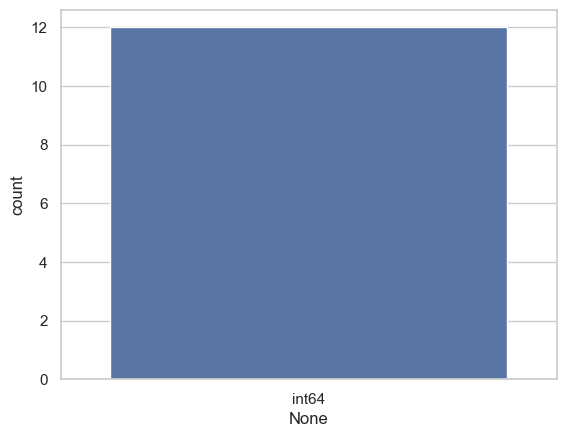

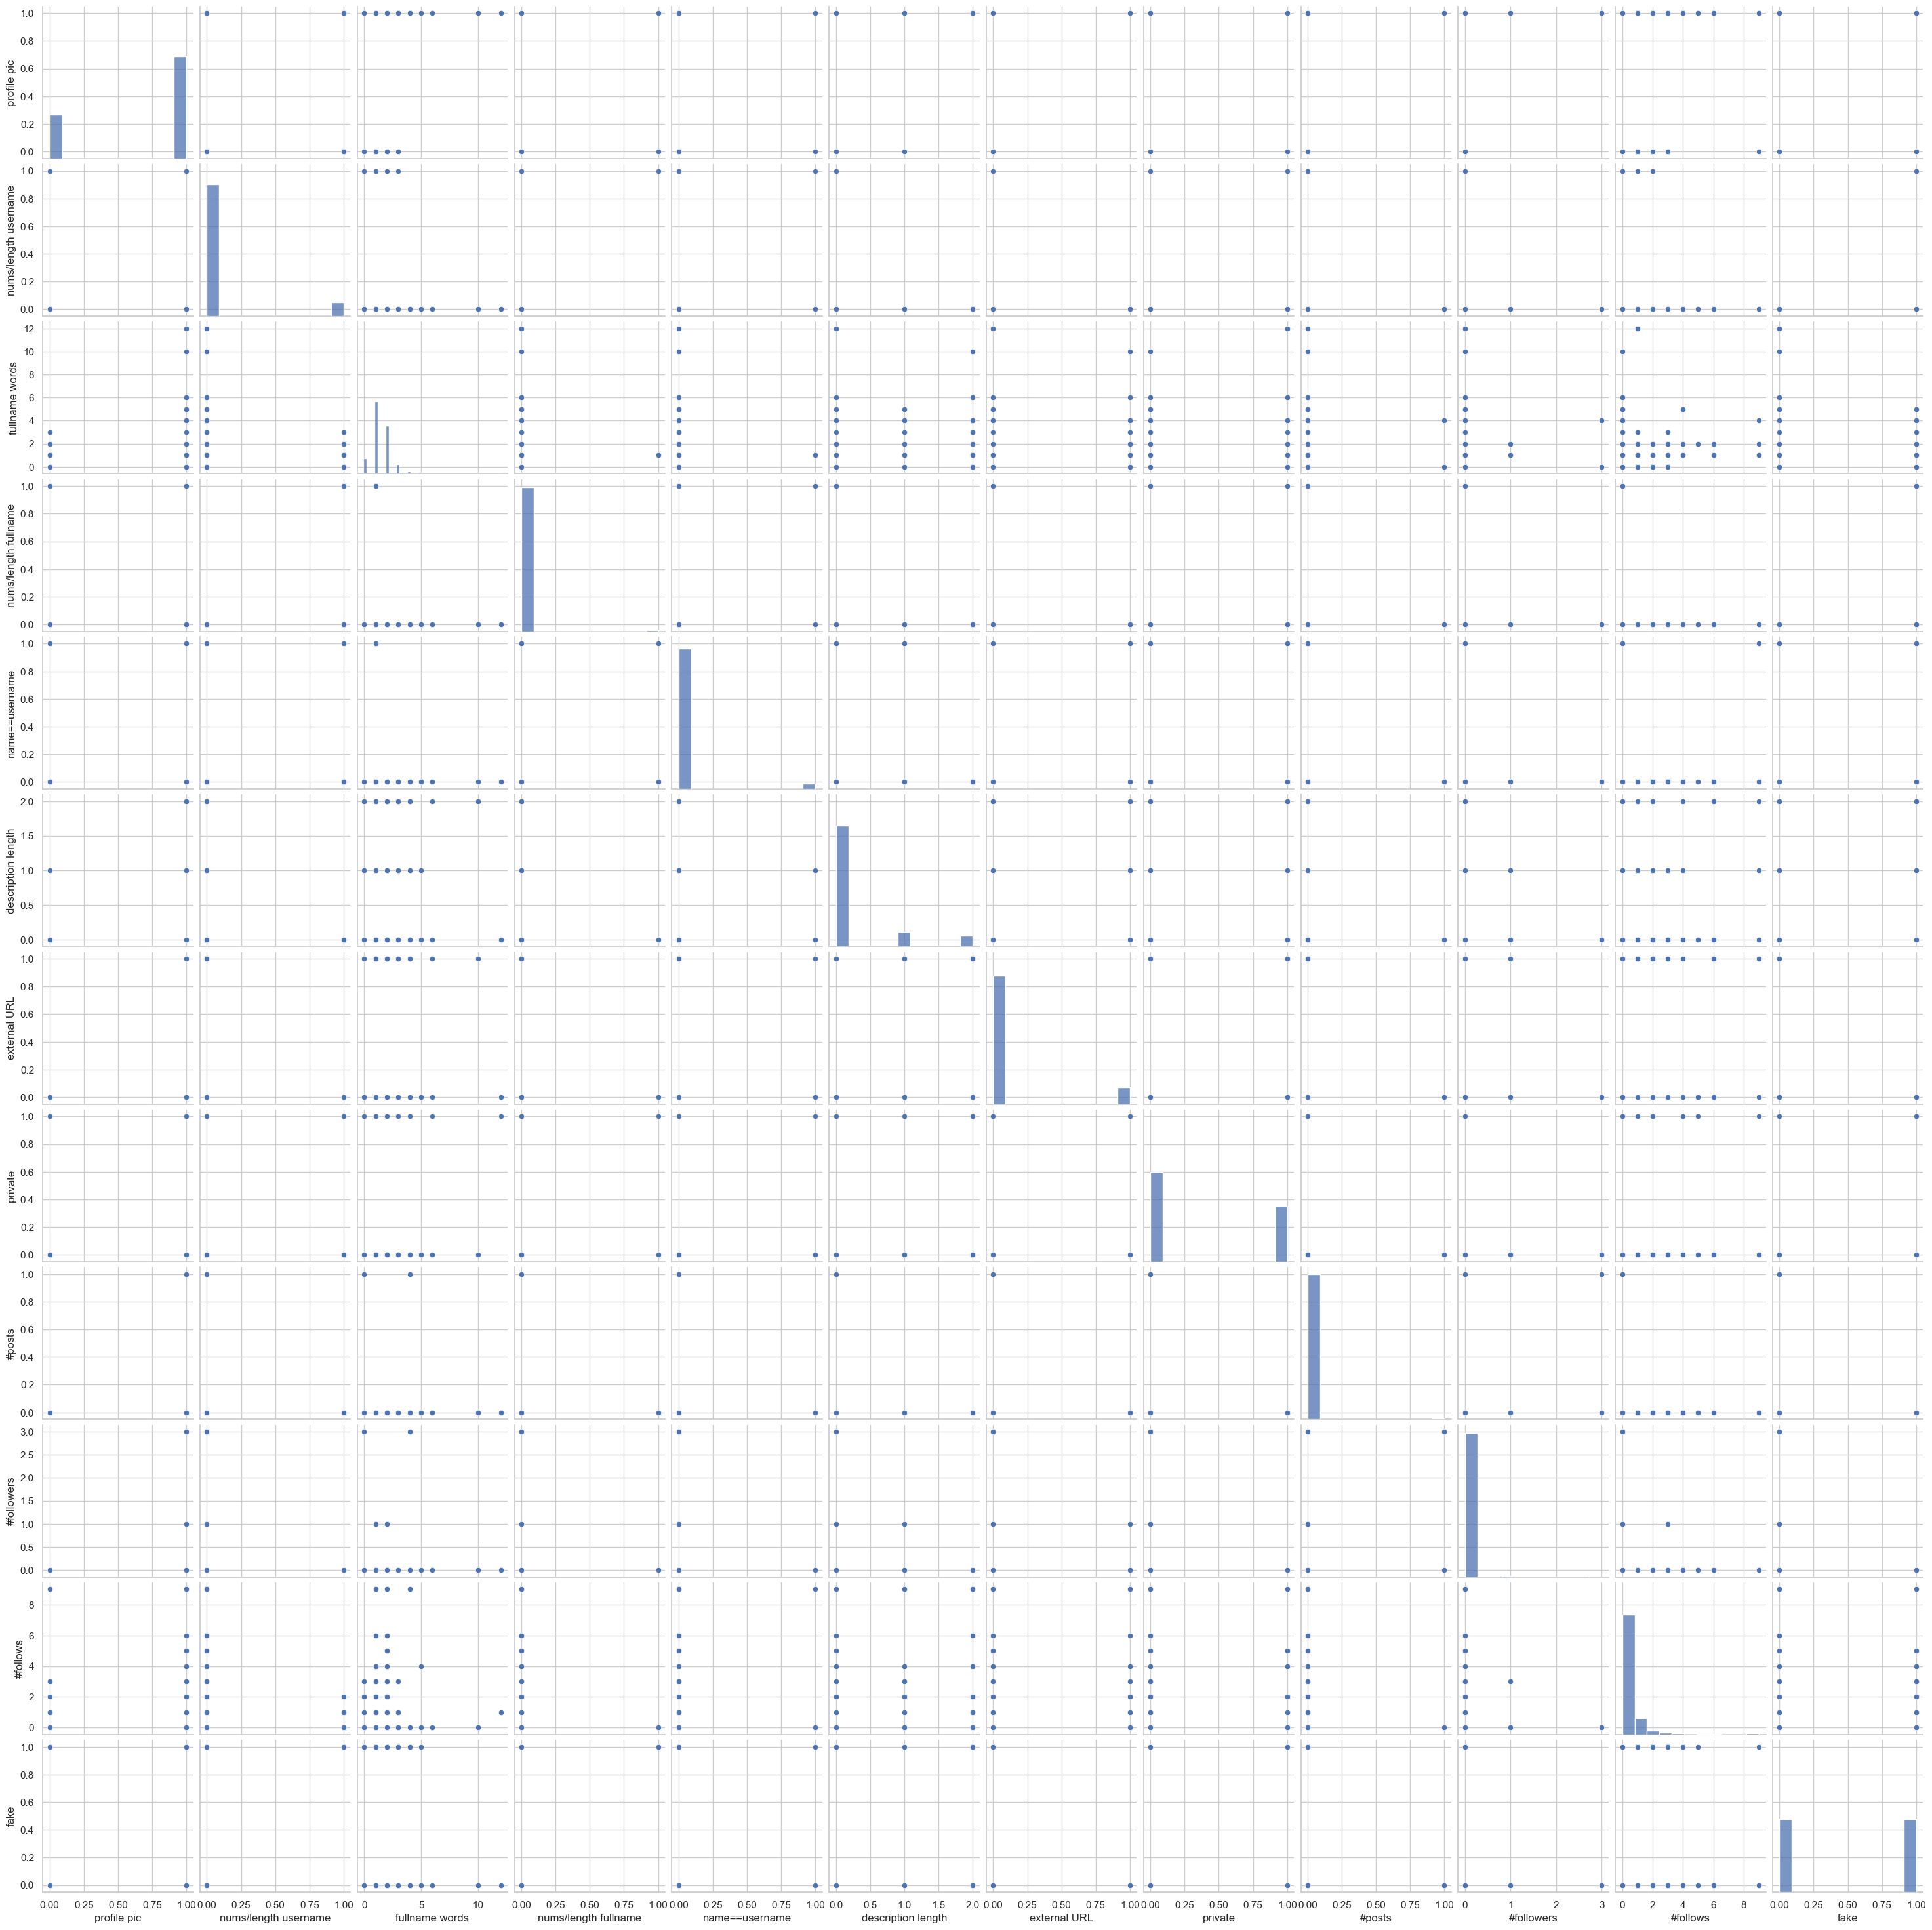

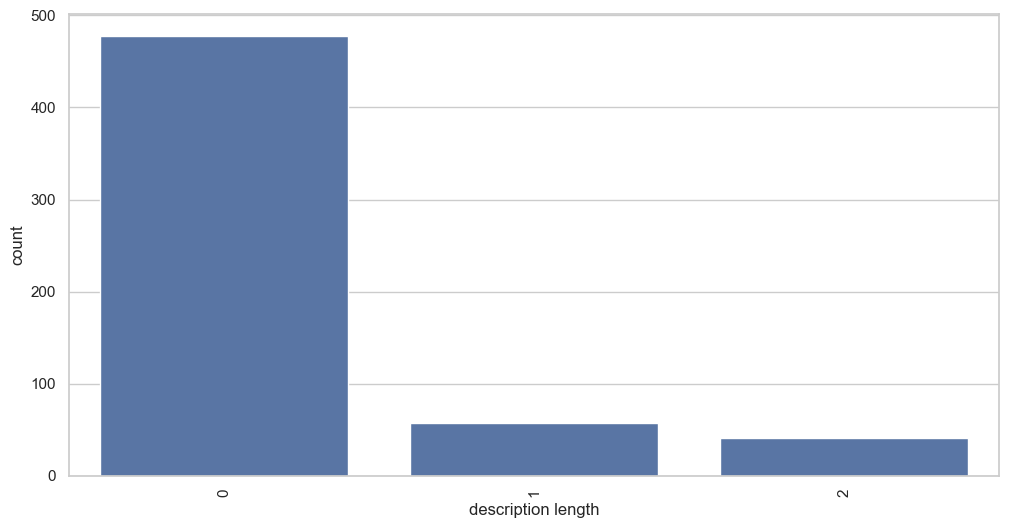

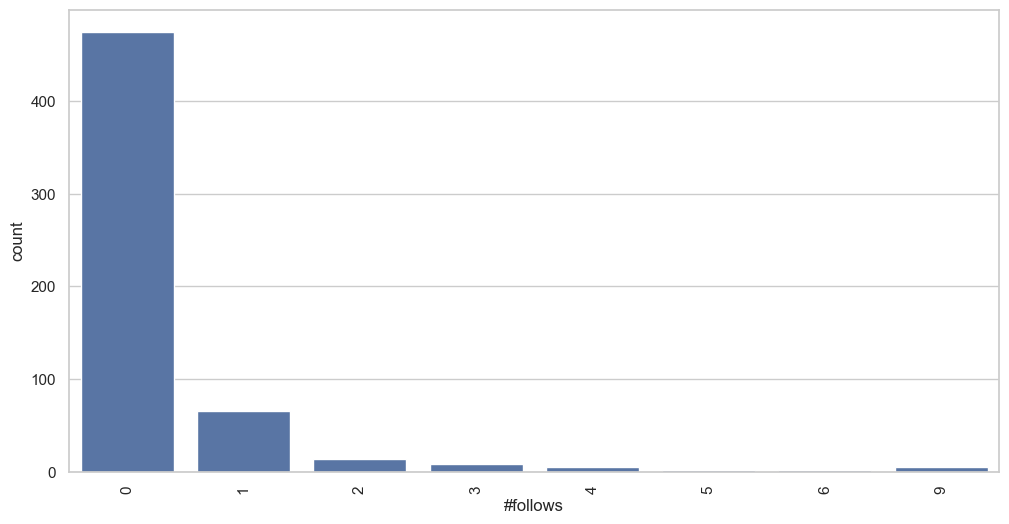

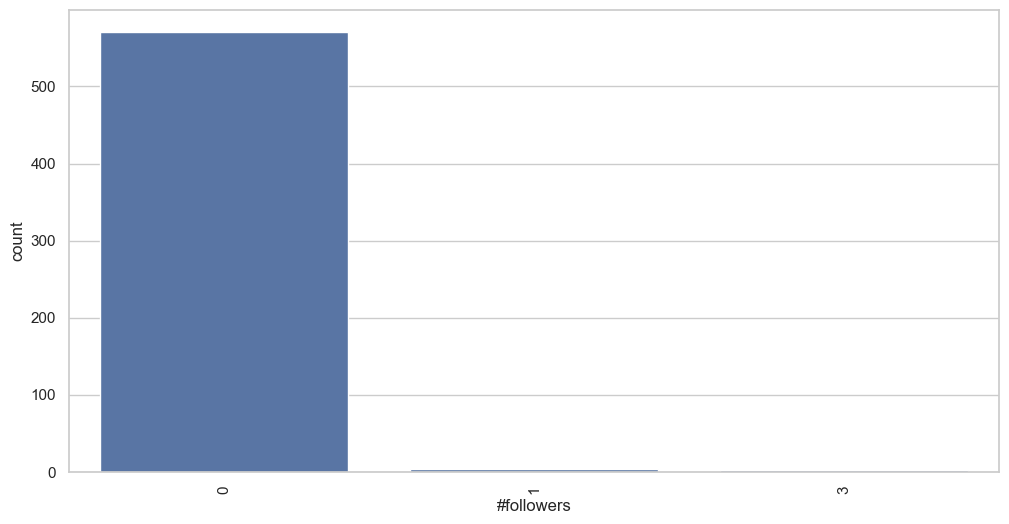

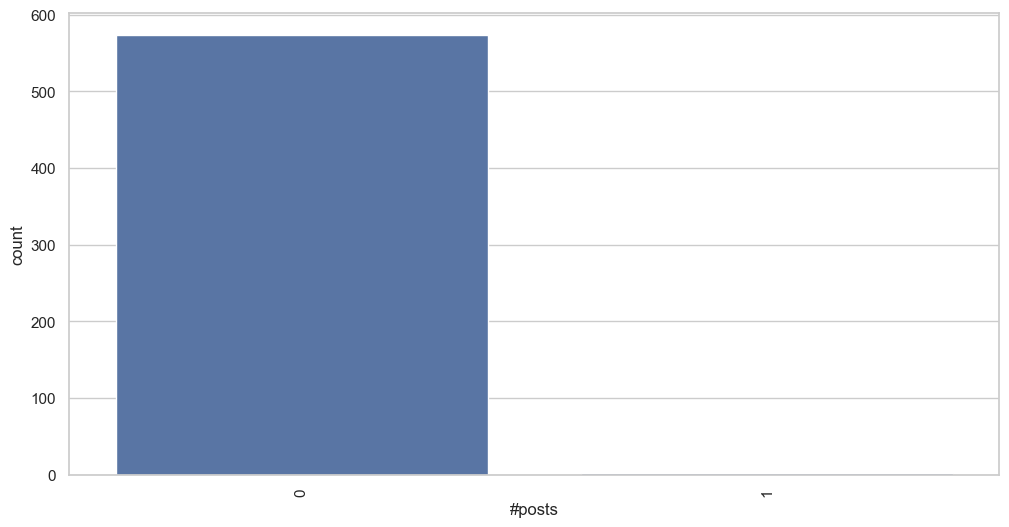

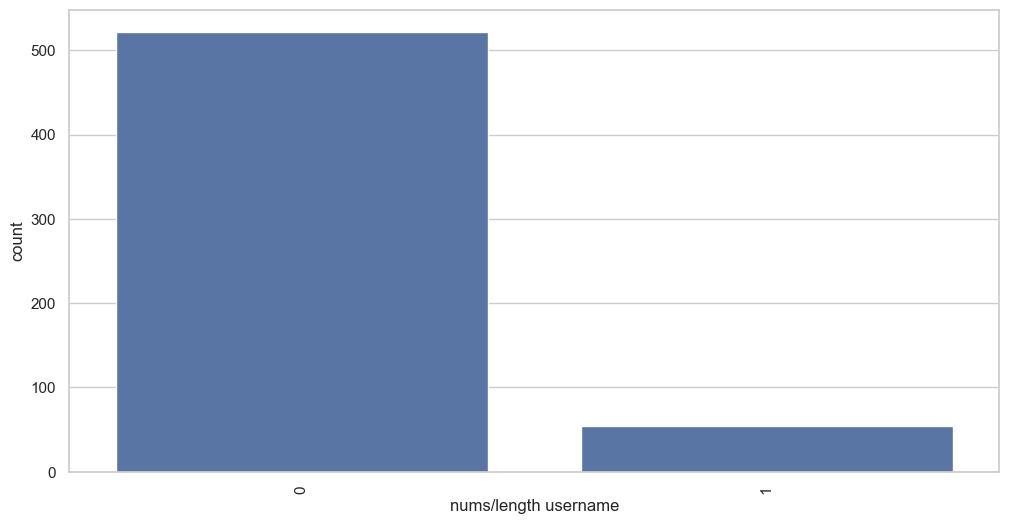

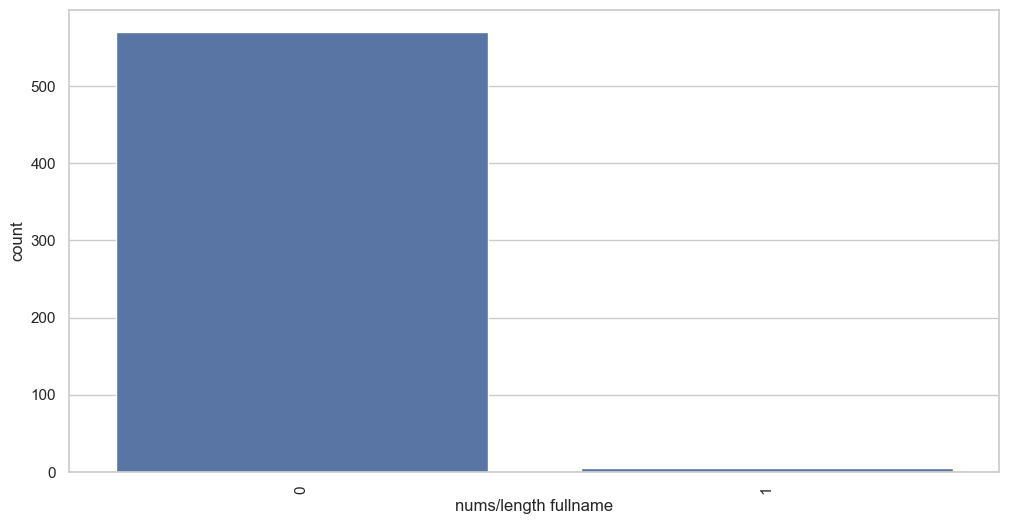

In [185]:
# Plot the distribution of data types
sns.set(style="whitegrid")
sns.countplot(x=train.dtypes)
plt.show()

# Visualize numeric features
sns.pairplot(train.select_dtypes(include='number'))
plt.show()

# Visualize bias in the data
sns.set(style="whitegrid")
for column in discrete_column:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=train)
    plt.xticks(rotation=90)
    plt.show()


# The Decision Tree made from Bing Copilot

In [170]:
import numpy as np

# The node feature of the decision tree
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature # 特徵
        self.threshold = threshold # 閾值
        self.left = left # 左子樹
        self.right = right # 右子樹
        self.value = value # 葉節點的值

# 定義決策樹的類別
class DecisionTreeLearner:
    def __init__(self, min_samples_split=2, max_depth=5):
        self.min_samples_split = min_samples_split # 最小分割樣本數
        self.max_depth = max_depth # 最大樹深
        self.root = None # 根節點

    # 計算資料的熵
    def entropy(self, y):
        counts = np.bincount(y) # 計算每個類別的數量
        probs = counts / len(y) # 計算每個類別的機率
        entropy = 0 # 初始化熵
        for p in probs:
            if p > 0: # 避免 log(0) 的情況
                entropy -= p * np.log2(p) # 累加熵的公式
        return entropy

    # 計算資料的信息增益
    def information_gain(self, y, y_left, y_right):
        p_left = len(y_left) / len(y) # 計算左子樹的機率
        p_right = len(y_right) / len(y) # 計算右子樹的機率
        gain = self.entropy(y) - (p_left * self.entropy(y_left) + p_right * self.entropy(y_right)) # 計算信息增益的公式
        return gain

    # 建立決策樹
    def build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape # 取得樣本數和特徵數
        n_classes = len(np.unique(y)) # 取得類別數

        # 終止條件：樣本數小於最小分割數、樹深大於最大深度、只有一個類別
        if (n_samples < self.min_samples_split or depth >= self.max_depth or n_classes == 1):
            # 回傳葉節點，值為該節點的類別
            value = np.bincount(y).argmax()
            return Node(value=value)

        # 初始化最佳分割的變數
        best_feature = None # 最佳特徵
        best_threshold = None # 最佳閾值
        best_gain = -np.inf # 最佳信息增益
        best_left = None # 最佳左子樹
        best_right = None # 最佳右子樹

        # 遍歷每個特徵
        for feature in range(n_features):
            # 取得該特徵的所有值
            feature_values = X[:, feature]
            # 遍歷每個可能的閾值
            for threshold in np.unique(feature_values):
                # 根據閾值分割資料
                left = np.where(feature_values <= threshold)[0]
                right = np.where(feature_values > threshold)[0]
                # 計算信息增益
                gain = self.information_gain(y, y[left], y[right])
                # 如果信息增益大於目前最佳，則更新最佳分割的變數
                if gain > best_gain:
                    best_feature = feature
                    best_threshold = threshold
                    best_gain = gain
                    best_left = left
                    best_right = right

        # 回傳分割節點，並遞迴建立左右子樹
        return Node(feature=best_feature, threshold=best_threshold, 
                    left=self.build_tree(X[best_left], y[best_left], depth+1), 
                    right=self.build_tree(X[best_right], y[best_right], depth+1))

    # 擬合資料
    def fit(self, X, y):
        # 建立決策樹並儲存為根節點
        self.root = self.build_tree(X, y)

    # 預測單一樣本
    def predict_one(self, x, node):
        # 如果節點是葉節點，則回傳節點的值
        if node.value is not None:
            return node.value
        # 如果節點不是葉節點，則根據特徵和閾值判斷走向左或右子樹
        if x[node.feature] <= node.threshold:
            return self.predict_one(x, node.left)
        else:
            return self.predict_one(x, node.right)

    # 預測多個樣本
    def predict(self, X):
        # 初始化預測結果的陣列
        preds = np.empty(len(X))
        # 遍歷每個樣本，並呼叫 predict_one() 方法
        for i, x in enumerate(X):
            preds[i] = self.predict_one(x, self.root)
        # 回傳預測結果
        return preds

# 建立決策樹物件
dt = DecisionTreeLearner(min_samples_split=5, max_depth=3)

# 擬合訓練集
dt.fit(X_train, y_train)

# 預測測試集
y_pred = dt.predict(X_test)

# 計算準確率
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.776


# The decision tree made from psuedocode

The main reference of this piece of code goes to the the textbook [sample codes](https://github.com/aimacode/aima-python/blob/master/learning.py#L394) which made from the volunteers.

In [196]:
import random

class TreeLeaf:
    def __init__(self, value):
        self.value = value

class DecisionFork:
    def __init__(self, attribute, attribute_name, default_value):
        self.attribute = attribute
        self.attribute_name = attribute_name
        self.default_value = default_value
        self.branches = {}

    def add(self, value, subtree):
        self.branches[value] = subtree

class DecisionTree:
    def __init__(self, min_samples_split=3, max_depth=5):
        self.min_samples_split = min_samples_split #3
        self.max_depth = max_depth #5
        
        self.target = '11' # the class (`fake`)
        self.attr_name = list(train.columns) # the actual name of the attributes
        self.root = None # the decision tree
        
    def plurality_value(self, examples):
        # Return the most common target value in the examples, breaking ties randomly
        # note that examples is a list of dictionaries, and self.target is the target attribute
        target_values = [example[self.target] for example in examples]

        # Manually count occurrences
        counts = {}
        for value in target_values:
            counts[value] = counts.get(value, 0) + 1

        # Find the most common value
        most_common = sorted(counts.items(), key=lambda x: x[1], reverse=True)

        # If there is a tie, shuffle the tied values and select one randomly
        if len(most_common) > 1 and most_common[0][1] == most_common[1][1]:
            # tied_values -> list
            tied_values = [value for value, count in most_common if count == most_common[0][1]]
            
            # shuffle the tied_value and return the first one of the shuffled data
            random.shuffle(tied_values)
            return TreeLeaf(tied_values[0])
        else:
            return TreeLeaf(most_common[0][0])

    def all_same_class(self, examples):
        # Check if all examples have the same target class
        return len(set([example[self.target] for example in examples])) == 1
    
    # The function that count entropy of the labels for the `information_gain`
    def entropy(self, labels):
        # Calculate entropy for a set of labels
        total_samples = len(labels)
        if total_samples == 0:
            return 0

        unique_classes, counts = np.unique(labels, return_counts=True)
        probabilities = counts / total_samples
        entropy_value = -np.sum(probabilities * np.log2(probabilities))

        return entropy_value
    
    # The function that does information gain for `choose_attribute`
    def information_gain(self, attribute, examples):
        # change examples to DataFrame to be able to use `groupby()`
        examples = pd.DataFrame(examples)
        # Calculate information gain for a given attribute
        total_entropy = self.entropy(examples[self.target])

        grouped_examples = examples.groupby(attribute)
        weighted_entropy = 0

        # counting the weight entropy
        for group_name, group_data in grouped_examples:
            group_weight = len(group_data) / len(examples)
            group_entropy = self.entropy(group_data[self.target])
            weighted_entropy += group_weight * group_entropy

        gain = total_entropy - weighted_entropy
        return gain
    
    # `choose_atrribute` is been made of information gain and entropy
    # (The way information gain and entropy works in this code is similar as it in the lecture note)
    def choose_attribute(self, attributes, examples):
        # Choose the attribute that maximizes information gain
        best_attribute = 0
        best_gain = -1

        # apply information_gain among the attributes that are features to find the best information gain for this current node (branch) 
        for attribute in attributes:
            if attribute != 11:
                gain = self.information_gain(attribute, examples)
                if gain > best_gain:
                    best_gain = gain
                    best_attribute = attribute

        return best_attribute

    # Split examples into groups based on the values of the specified attribute
    def split_by(self, attribute, examples):
        grouped_examples = {} # dictionary type
        for example in examples:
            value = example[attribute]
            if value not in grouped_examples:
                grouped_examples[value] = []
            grouped_examples[value].append(example)
        return grouped_examples.items()
    
    def remove_all(self, attribute, attrs):
        # Remove the specified attribute from the list of attributes
        return [attr for attr in attrs if attr != attribute]
    
    # generated from the psuedocode at `Figure 18.5`
    def decision_tree_learning(self, examples, attributes, parent_examples=(), depth=0):
        if len(examples) == 0:
            return self.plurality_value(parent_examples)
        if self.all_same_class(examples):
            return TreeLeaf(examples[0][self.target]) # the classification
        if len(attributes) == 0 or len(attributes) < self.min_samples_split or depth >= self.max_depth:
            return self.plurality_value(examples)
        A = self.choose_attribute(attributes, examples)
        tree = DecisionFork(A, self.attr_name[int(A)], self.plurality_value(examples))
        for (v_k, exs) in self.split_by(A, examples):
            subtree = self.decision_tree_learning(exs, self.remove_all(A, attributes), examples, depth+1)
            tree.add(v_k, subtree)
        return tree
    
    # do the simple initialization of the given splited data for fitting the model
    def fit(self, X, y):
        # initialize the example and sample for decision tree 
        # convert X_train and y_train to DataFrames
        X_df = pd.DataFrame(X)
        y_df = pd.DataFrame(y, columns=['11']) # define colemn `11` for the class of original dataset
        # concatenate X_df and y_df
        example = pd.concat([X_df, y_df], axis=1).to_dict('records') # change it to dictionary
        attribute = list(range(len(example[0])))
        
        # build a decision tree and save the tree to the `self.root`
        self.root = self.decision_tree_learning(example, attribute)
    
    # perdict the data from test set
    def predict(self, samples):
        predictions = []
        # iterate the test sets
        for sample in samples:
            current_node = self.root  # self.root is the root of the decision tree
            # iterate through the tree
            while isinstance(current_node, DecisionFork):
                attribute_value = sample[current_node.attribute]
                if attribute_value in current_node.branches:
                    current_node = current_node.branches[attribute_value]
                else:
                    # If the value is not in the branches, return the default value
                    predictions.append(current_node.default_value.value)
                    break
            # break out of the above while loop -> traverse to the leaf
            if isinstance(current_node, TreeLeaf):
                predictions.append(current_node.value)
        return np.array(predictions)

    # generate the tree structure by recursive
    def visualize(self, node=None, depth=0):
        if node is None:
            node = self.root

        # traverse the tree
        if isinstance(node, DecisionFork):
            print("|" + "---" * depth + f"{self.attr_name[node.attribute]} = ?") # print the decision attribute
            for branch_value, branch_node in node.branches.items():
                print("|" + "---" * (depth + 1) + f"{branch_value}") # print the decision node
                self.visualize(branch_node, depth + 2) # recursive call the next two depth
        elif isinstance(node, TreeLeaf):
            # print the leaf if it reach the leaf
            print("|" + "---" * depth + f"Class: {node.value}")

# build the decision tree object
dt = DecisionTree()

# fit the training data to the tree
dt.fit(X_train, y_train)

# perdict the value from the test case
y_pred = dt.predict(X_test)
print(y_pred)

# calculate accuracy
correct_predictions = np.sum(y_test == y_pred)
total_samples = len(y_test)
acc = correct_predictions / total_samples
print(f"Accuracy: {acc:.3f}")

[0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1
 0 0 0 0 0]
Accuracy: 0.767


In [197]:
# perdict the value from the test case
y_pred = dt.predict(X_sample)
print(y_pred)

# calculate accuracy (by `sklearn.metrics`)
correct_predictions = np.sum(y_sample == y_pred)
total_samples = len(y_sample)
acc = correct_predictions / total_samples
print(f"Accuracy: {acc:.3f}")

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0
 0 1 1 0 0 0 1 1 0]
Accuracy: 0.800


In [198]:
dt.visualize()

|profile pic = ?
|---0
|------#follows = ?
|---------0
|------------Class: 1
|---------1
|------------fullname words = ?
|---------------1
|------------------Class: 1
|---------------0
|------------------Class: 0
|---------2
|------------Class: 1
|---------9
|------------Class: 1
|---1
|------fullname words = ?
|---------1
|------------description length = ?
|---------------1
|------------------Class: 0
|---------------0
|------------------nums/length username = ?
|---------------------0
|------------------------name==username = ?
|---------------------------0
|------------------------------Class: 0
|---------------------------1
|------------------------------Class: 1
|---------------------1
|------------------------Class: 1
|---------------2
|------------------Class: 0
|---------0
|------------private = ?
|---------------1
|------------------#follows = ?
|---------------------0
|------------------------nums/length username = ?
|---------------------------0
|---------------------------